# Machine Learning

# Problem 1

# You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

# Importing all the important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix


# Question 1.1

# Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.

In [2]:
df=pd.read_csv('Election_Data.csv')

In [3]:
df.head(10)

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male
5,6,Labour,47,3,4,4,4,4,2,male
6,7,Labour,57,2,2,4,4,11,2,male
7,8,Labour,77,3,4,4,1,1,0,male
8,9,Labour,39,3,3,4,4,11,0,female
9,10,Labour,70,3,2,5,1,11,2,male


In [4]:
df.tail(10)

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1515,1516,Conservative,82,2,2,2,1,11,2,female
1516,1517,Labour,30,3,4,4,2,4,2,male
1517,1518,Labour,76,4,3,2,2,11,2,male
1518,1519,Labour,50,3,4,4,2,5,2,male
1519,1520,Conservative,35,3,4,4,2,8,2,male
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [5]:
df.shape

(1525, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525.0,763.000000,440.373894,1.0,382.0,763.0,1144.0,1525.0
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [8]:
df.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [11]:
df=df.drop('Unnamed: 0',axis=1)

In [12]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [13]:
dups=df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(1517, 9)

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,3.245221,0.881792,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,3.137772,0.931069,1.0,3.0,3.0,4.0,5.0
Blair,1517.0,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0


In [17]:
print(df.vote.value_counts())
print('\n')
print(df.gender.value_counts())

Labour          1057
Conservative     460
Name: vote, dtype: int64


female    808
male      709
Name: gender, dtype: int64


In [18]:
df.skew().T

C:\Users\User\AppData\Local\Temp/ipykernel_10772/1956230054.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew().T


age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

<AxesSubplot:>

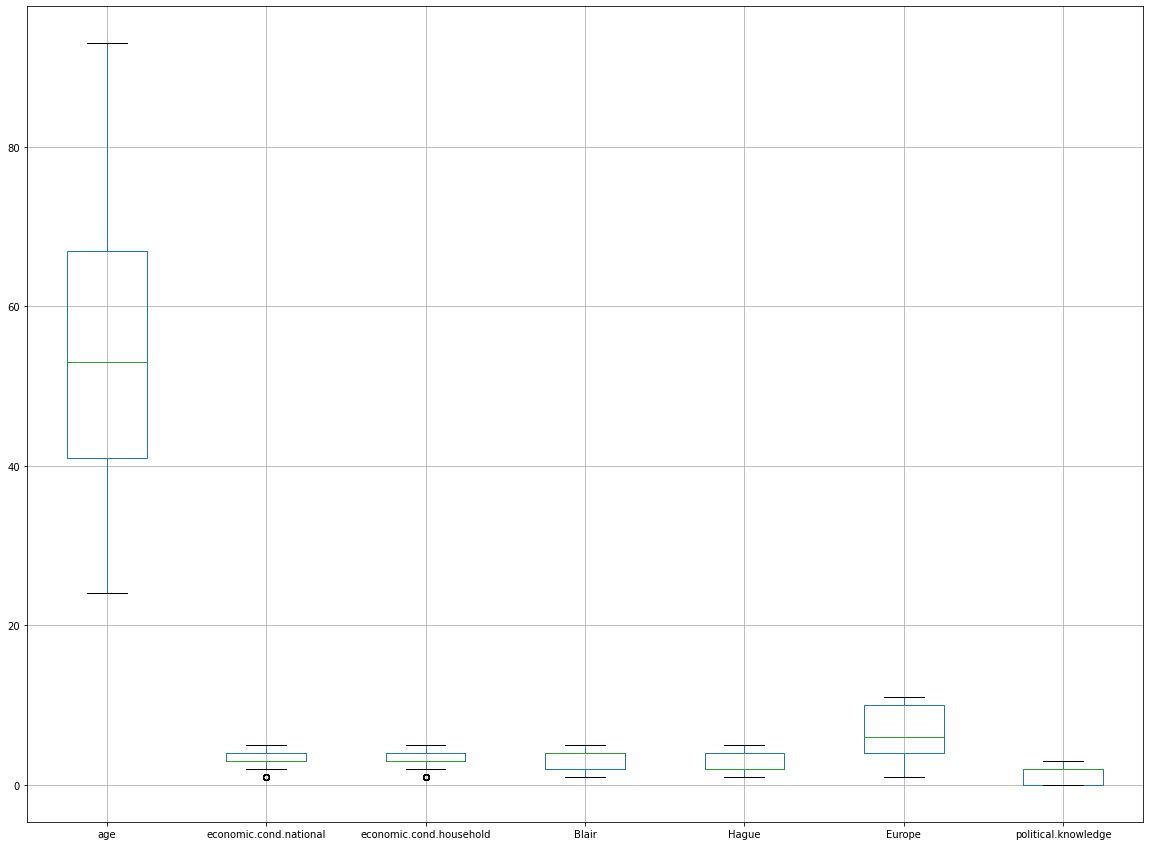

In [19]:
df.boxplot(figsize=(20,15))

In [20]:
df.skew()

C:\Users\User\AppData\Local\Temp/ipykernel_10772/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

# Question 1.2

# Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

# Answer

In [21]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [22]:
df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [23]:
df.shape

(1517, 9)

# Univariate

In [24]:
df_num= df.select_dtypes(include= ['int64'])
df_cat=df.select_dtypes(["object"])


In [25]:
df_num.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
0,43,3,3,4,1,2,2
1,36,4,4,4,4,5,2
2,35,4,4,5,2,3,2
3,24,4,2,2,1,4,0
4,41,2,2,1,1,6,2


In [26]:
df_cat.head()

,vote,gender
0,Labour,female
1,Labour,male
2,Labour,male
3,Labour,female
4,Labour,male


C:\Users\User\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


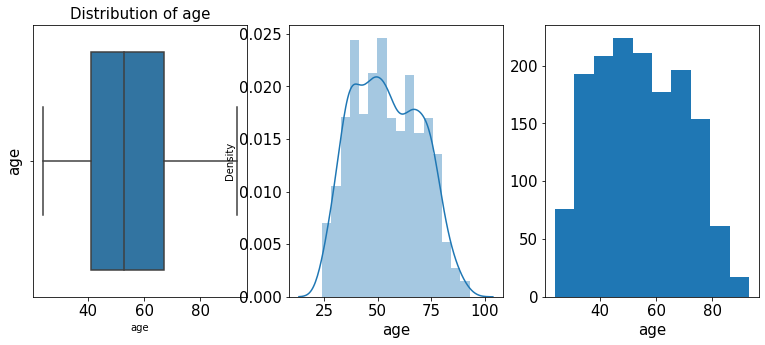

In [27]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='age',data=df,orient='v',ax=ax1)
ax1.set_ylabel('age', fontsize=15)
ax1.set_title('Distribution of age', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['age'],ax=ax2)
ax2.set_xlabel('age', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['age'])
ax3.set_xlabel('age', fontsize=15)
ax3.tick_params(labelsize=15)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


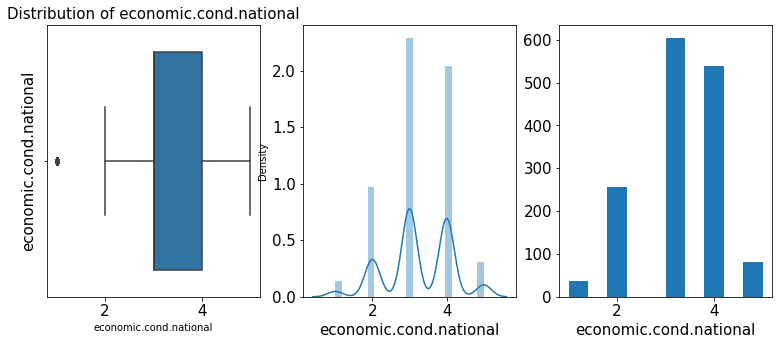

In [28]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='economic.cond.national',data=df,orient='v',ax=ax1)
ax1.set_ylabel('economic.cond.national', fontsize=15)
ax1.set_title('Distribution of economic.cond.national', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['economic.cond.national'],ax=ax2)
ax2.set_xlabel('economic.cond.national', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['economic.cond.national'])
ax3.set_xlabel('economic.cond.national', fontsize=15)
ax3.tick_params(labelsize=15)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


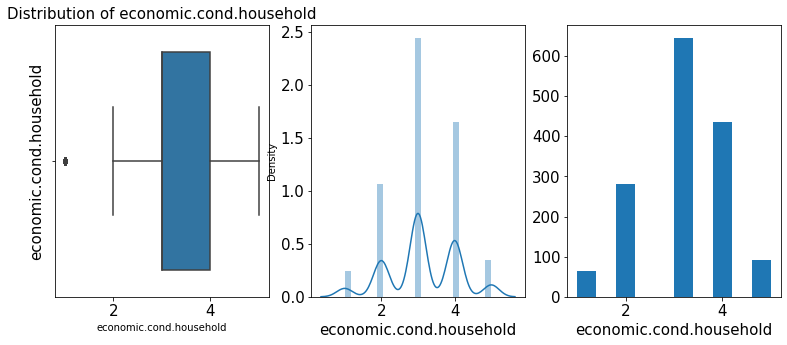

In [29]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='economic.cond.household',data=df,orient='v',ax=ax1)
ax1.set_ylabel('economic.cond.household', fontsize=15)
ax1.set_title('Distribution of economic.cond.household', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['economic.cond.household'],ax=ax2)
ax2.set_xlabel('economic.cond.household', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['economic.cond.household'])
ax3.set_xlabel('economic.cond.household', fontsize=15)
ax3.tick_params(labelsize=15)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


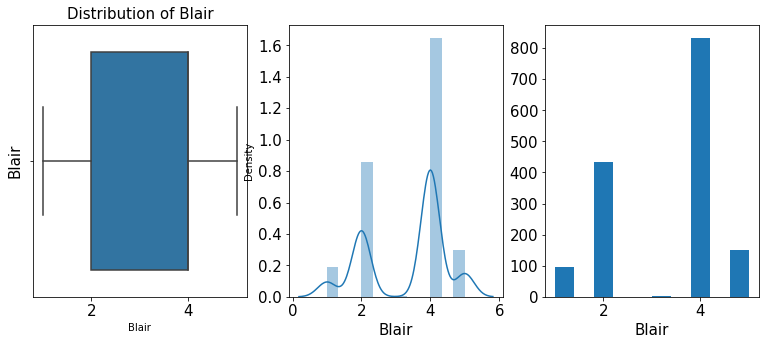

In [30]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='Blair',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Blair', fontsize=15)
ax1.set_title('Distribution of Blair', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['Blair'],ax=ax2)
ax2.set_xlabel('Blair', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Blair'])
ax3.set_xlabel('Blair', fontsize=15)
ax3.tick_params(labelsize=15)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


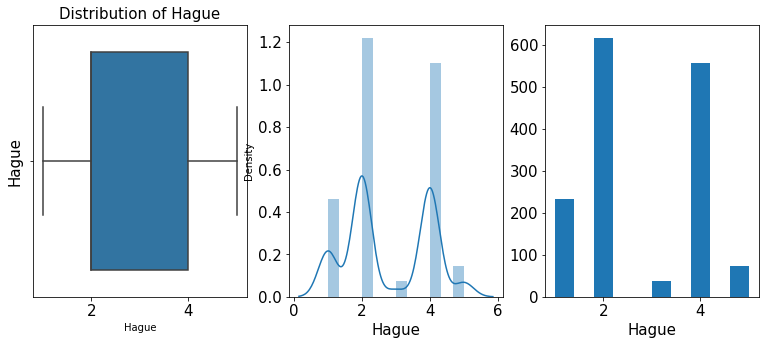

In [31]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='Hague',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Hague', fontsize=15)
ax1.set_title('Distribution of Hague', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['Hague'],ax=ax2)
ax2.set_xlabel('Hague', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Hague'])
ax3.set_xlabel('Hague', fontsize=15)
ax3.tick_params(labelsize=15)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


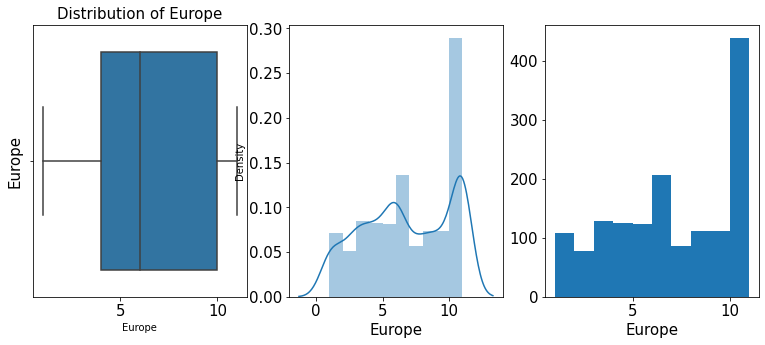

In [32]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='Europe',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Europe', fontsize=15)
ax1.set_title('Distribution of Europe', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['Europe'],ax=ax2)
ax2.set_xlabel('Europe', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Europe'])
ax3.set_xlabel('Europe', fontsize=15)
ax3.tick_params(labelsize=15)

In [33]:
df.skew()

C:\Users\User\AppData\Local\Temp/ipykernel_10772/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


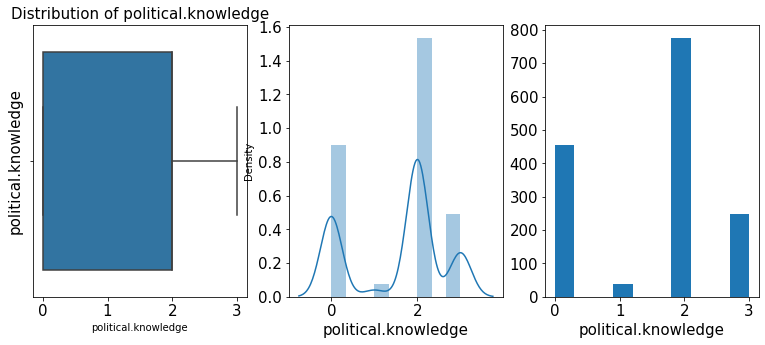

In [34]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='political.knowledge',data=df,orient='v',ax=ax1)
ax1.set_ylabel('political.knowledge', fontsize=15)
ax1.set_title('Distribution of political.knowledge', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['political.knowledge'],ax=ax2)
ax2.set_xlabel('political.knowledge', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['political.knowledge'])
ax3.set_xlabel('political.knowledge', fontsize=15)
ax3.tick_params(labelsize=15)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'economic.cond.national'}>,
        <AxesSubplot:title={'center':'economic.cond.household'}>],
       [<AxesSubplot:title={'center':'Blair'}>,
        <AxesSubplot:title={'center':'Hague'}>,
        <AxesSubplot:title={'center':'Europe'}>],
       [<AxesSubplot:title={'center':'political.knowledge'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

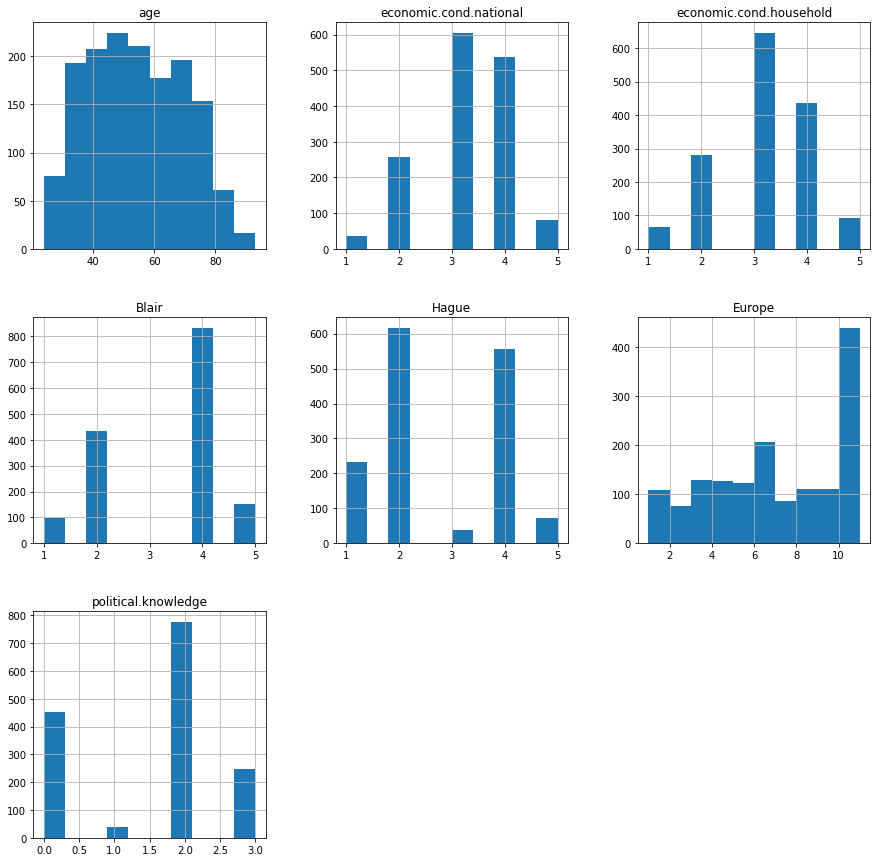

In [35]:
df.hist(figsize=(15,15))

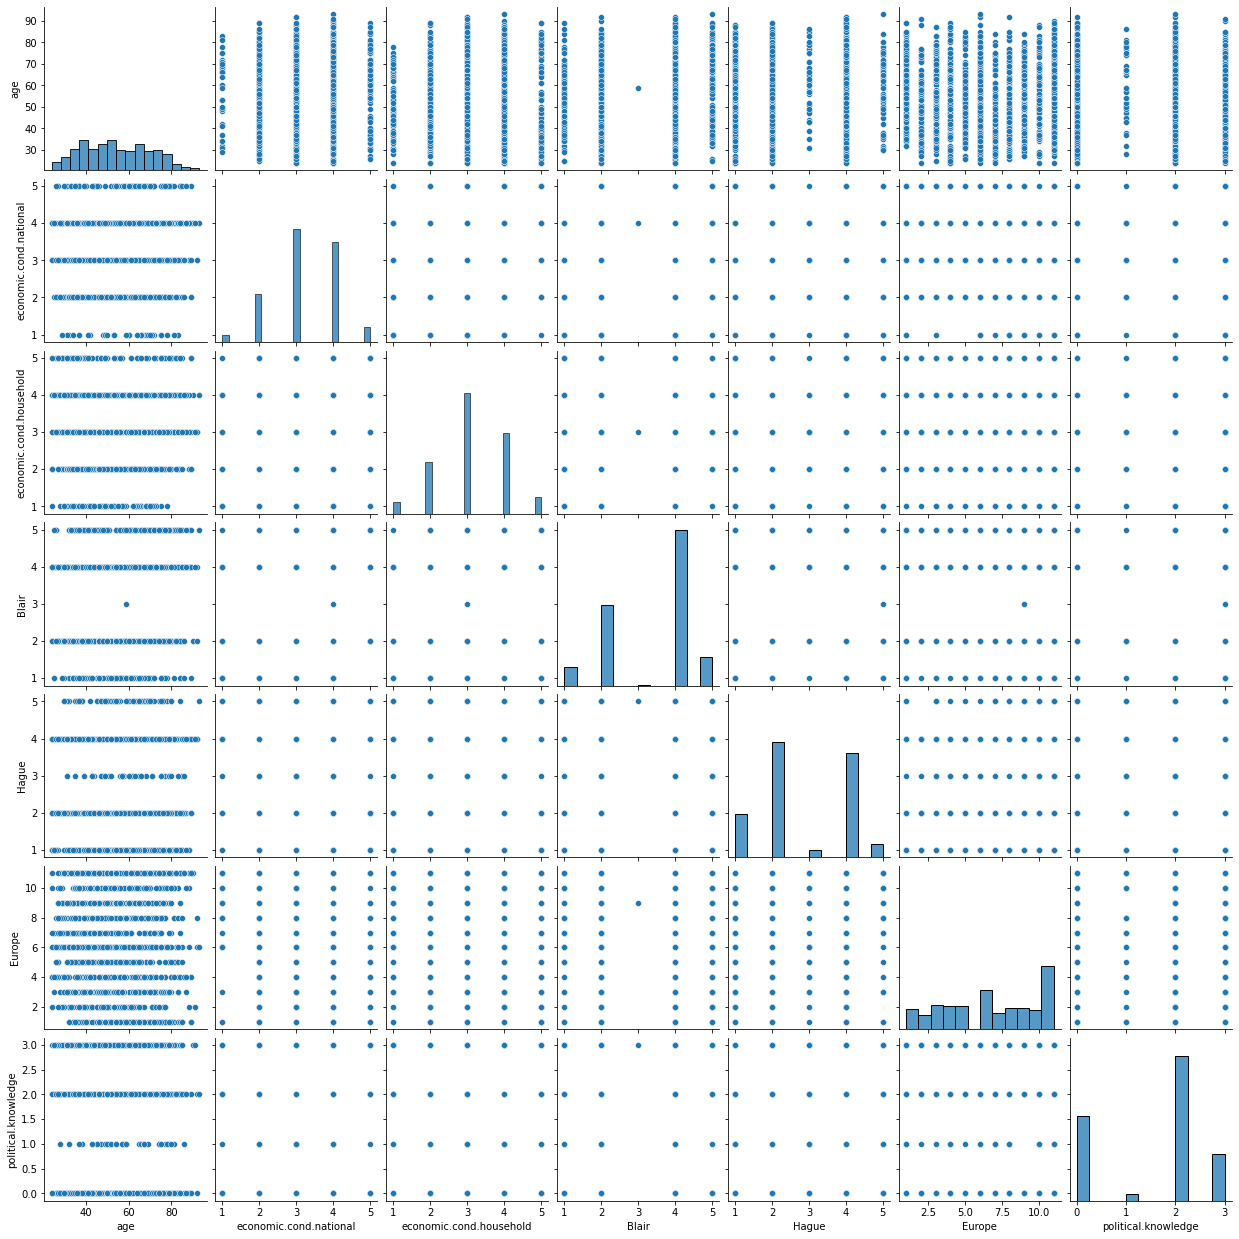

In [36]:
sns.pairplot(df)

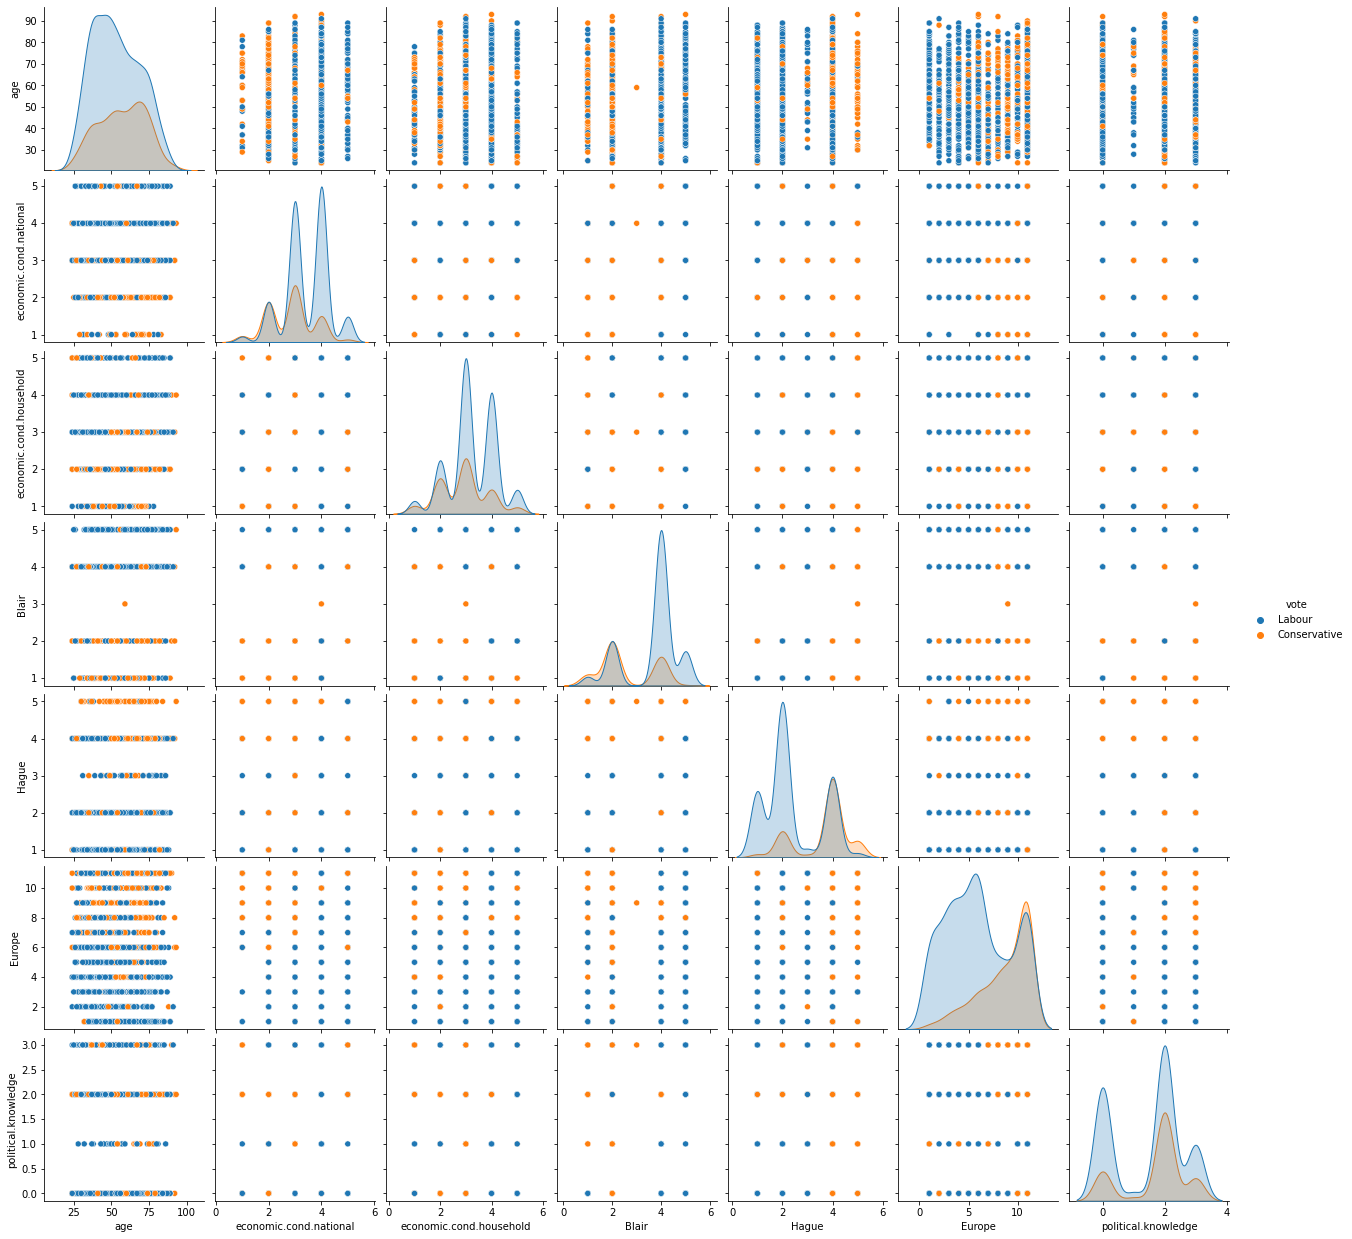

In [37]:
sns.pairplot(df,hue='vote')

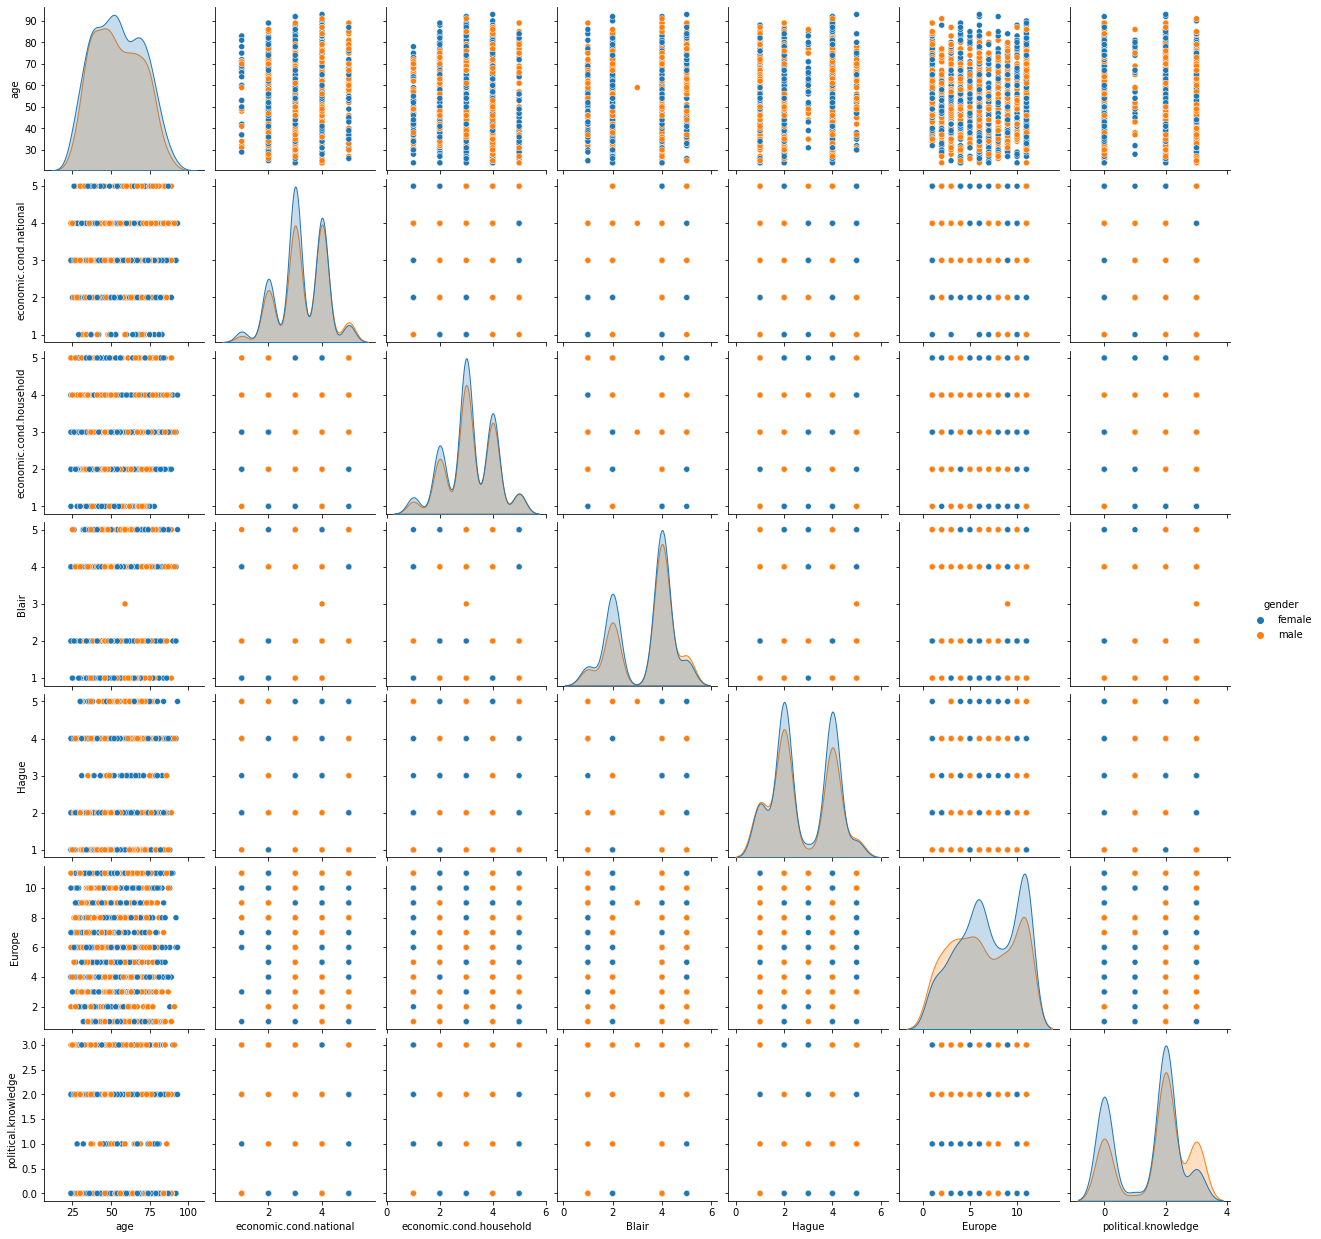

In [38]:
sns.pairplot(df,hue='gender')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vote', ylabel='economic.cond.national'>

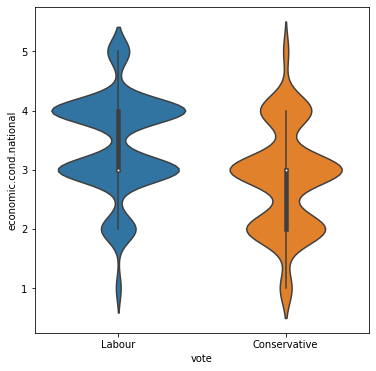

In [39]:
plt.figure(figsize=(6,6))
sns.violinplot(df["vote"], df['economic.cond.national'],data=df)



C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vote', ylabel='economic.cond.household'>

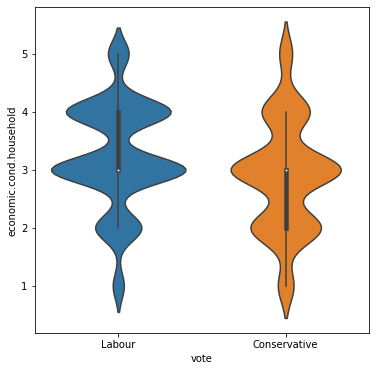

In [40]:
plt.figure(figsize=(6,6))
sns.violinplot(df["vote"], df['economic.cond.household'],data=df)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vote', ylabel='Blair'>

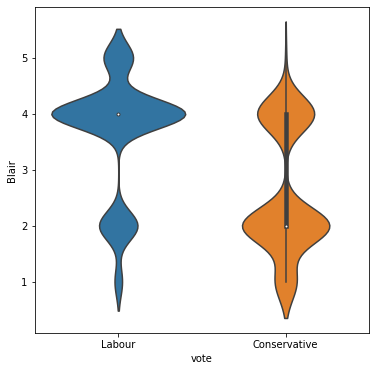

In [41]:
plt.figure(figsize=(6,6))
sns.violinplot(df["vote"], df['Blair'],data=df)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vote', ylabel='Hague'>

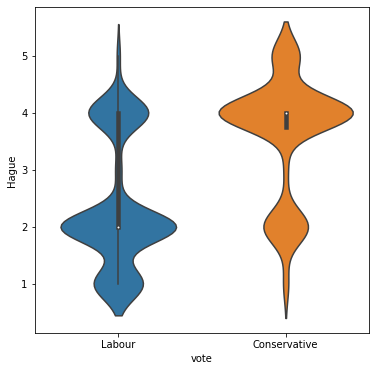

In [42]:
plt.figure(figsize=(6,6))
sns.violinplot(df["vote"], df['Hague'],data=df)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vote', ylabel='Europe'>

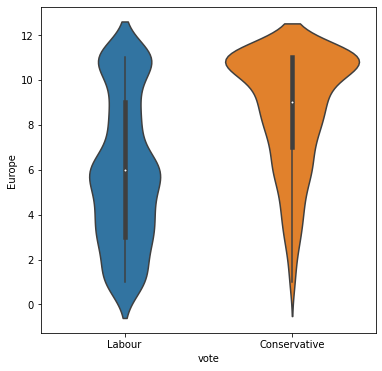

In [43]:
plt.figure(figsize=(6,6))
sns.violinplot(df["vote"], df['Europe'],data=df)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vote', ylabel='political.knowledge'>

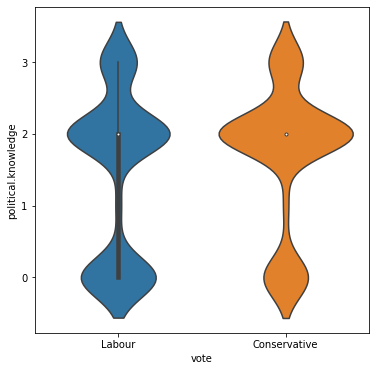

In [44]:
plt.figure(figsize=(6,6))
sns.violinplot(df["vote"], df['political.knowledge'],data=df)

In [45]:
df.corr().T

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.018687,-0.038868,0.032084,0.031144,0.064562,-0.046598
economic.cond.national,0.018687,1.000000,0.347687,0.326141,-0.200790,-0.209150,-0.023510
economic.cond.household,-0.038868,0.347687,1.000000,0.215822,-0.100392,-0.112897,-0.038528
Blair,0.032084,0.326141,0.215822,1.000000,-0.243508,-0.295944,-0.021299
Hague,0.031144,-0.200790,-0.100392,-0.243508,1.000000,0.285738,-0.029906
Europe,0.064562,-0.209150,-0.112897,-0.295944,0.285738,1.000000,-0.151197
political.knowledge,-0.046598,-0.023510,-0.038528,-0.021299,-0.029906,-0.151197,1.000000


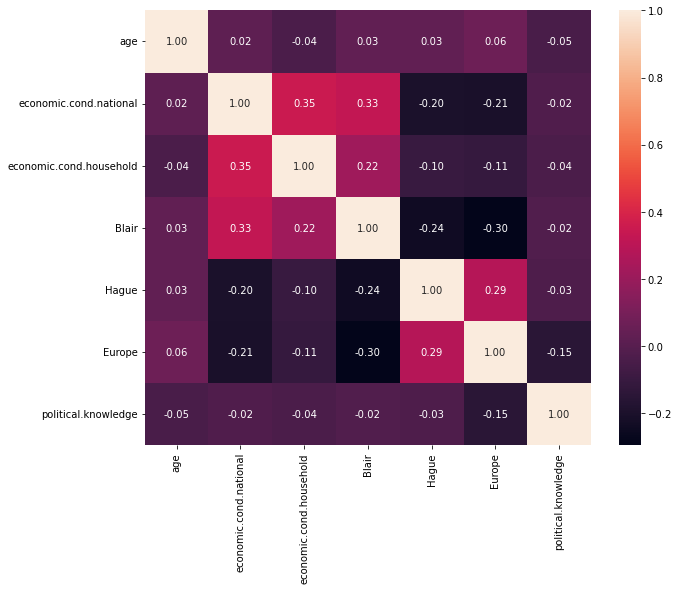

In [46]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

<AxesSubplot:>

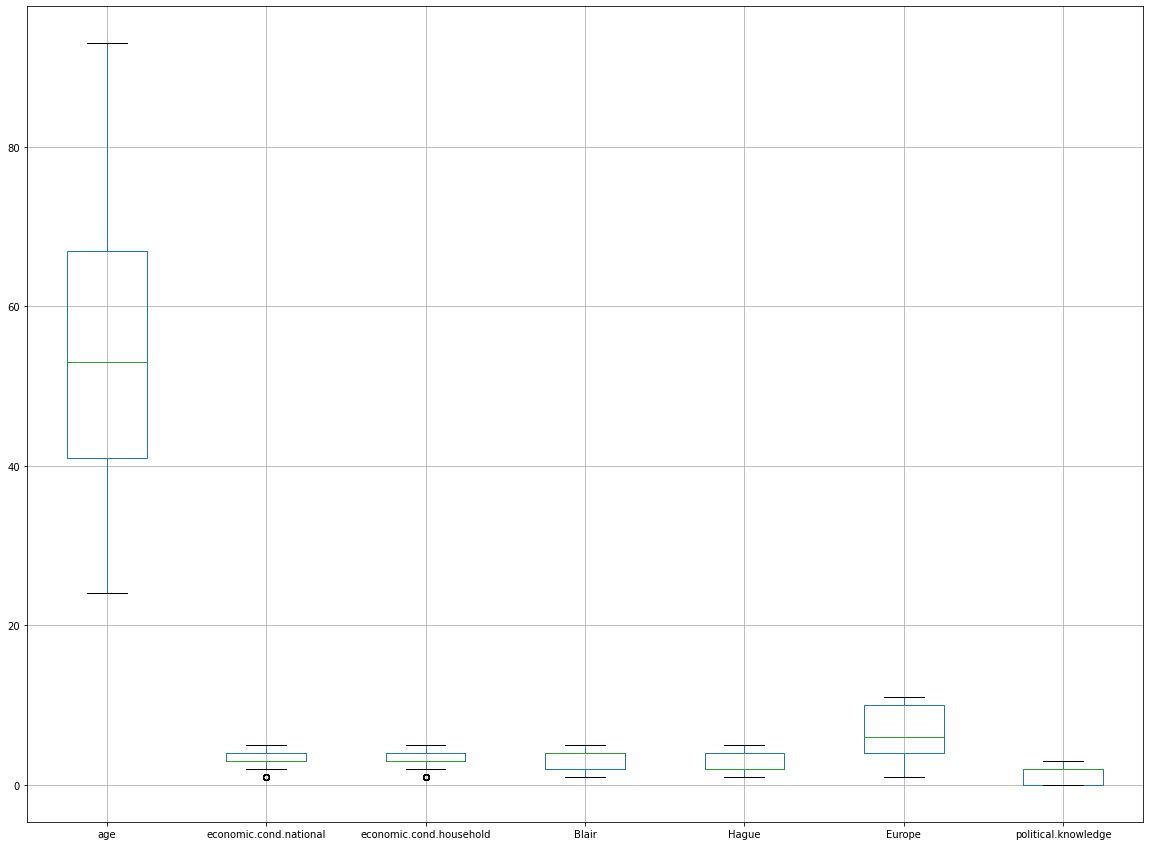

In [47]:
df.boxplot(figsize=(20,15))

# As we can see that we have 2 outliers in given data set
# 1. economic.cond.national
# 2. economic.cond.household

In [48]:
cols= ["economic.cond.national","economic.cond.household" ]

In [49]:
def remove_outlier(col): 
    sorted(col) 
    Q1,Q3=np.percentile(col,[25,75]) 
    IQR=Q3-Q1 
    lower_range= Q1-(1.5 * IQR) 
    upper_range= Q3+(1.5 * IQR) 
    return lower_range, upper_range

In [50]:
for column in df[cols].columns: 
    lr,ur=remove_outlier(df[column]) 
    df[column]=np.where(df[column]>ur,ur,df[column]) 
    df[column]=np.where(df[column]<lr,lr,df[column])

<AxesSubplot:>

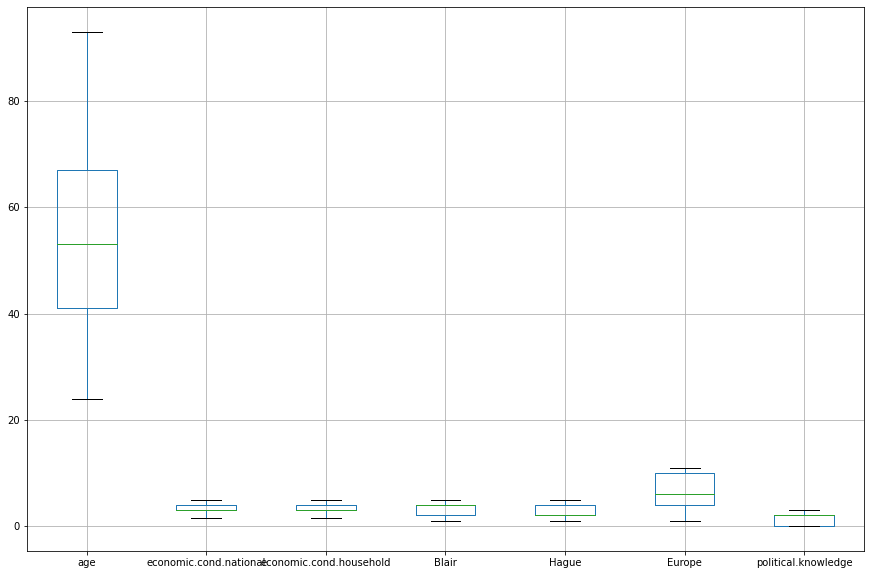

In [51]:
df.boxplot(figsize=(15,10))

In [52]:
df.skew(axis=0,skipna=True).sort_values(ascending=False)

C:\Users\User\AppData\Local\Temp/ipykernel_10772/85500287.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew(axis=0,skipna=True).sort_values(ascending=False)


Hague                      0.146191
age                        0.139800
economic.cond.household    0.091833
economic.cond.national    -0.069946
Europe                    -0.141891
political.knowledge       -0.422928
Blair                     -0.539514
dtype: float64

#Bivariate analysis is one of the simplest forms of quantitative analysis. It involves the analysis of two variables (X, Y), for the purpose of determining the empirical relationship between them.It is the analysis of the relationship between the two variables.

# Question 1.3

# Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.

# Answer

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,3.257416,0.853647,1.5,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,3.159196,0.886279,1.5,3.0,3.0,4.0,5.0
Blair,1517.0,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0


In [54]:
df.dtypes[(df.dtypes=='object')].index

Index(['vote', 'gender'], dtype='object')

In [55]:
cat1= ['vote','gender']

In [56]:
dff=pd.get_dummies(df, columns=cat1,drop_first=True)
dff.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3.0,3.0,4,1,2,2,1,0
1,36,4.0,4.0,4,4,5,2,1,1
2,35,4.0,4.0,5,2,3,2,1,1
3,24,4.0,2.0,2,1,4,0,1,0
4,41,2.0,2.0,1,1,6,2,1,1


In [57]:
dff.vote_Labour.value_counts()

1    1057
0     460
Name: vote_Labour, dtype: int64

In [58]:
dff.gender_male.value_counts()

0    808
1    709
Name: gender_male, dtype: int64

In [59]:
dff.shape

(1517, 9)

In [60]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1517 non-null   int64  
 1   economic.cond.national   1517 non-null   float64
 2   economic.cond.household  1517 non-null   float64
 3   Blair                    1517 non-null   int64  
 4   Hague                    1517 non-null   int64  
 5   Europe                   1517 non-null   int64  
 6   political.knowledge      1517 non-null   int64  
 7   vote_Labour              1517 non-null   uint8  
 8   gender_male              1517 non-null   uint8  
dtypes: float64(2), int64(5), uint8(2)
memory usage: 130.1 KB


# Train the data in 70:30 into train and test

In [61]:
X= dff.drop("vote_Labour",axis=1)
y= dff[["vote_Labour"]]

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [63]:
X_train.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
991,34,2.0,4.0,1,4,11,2,0
1274,40,4.0,3.0,4,4,6,0,1
649,61,4.0,3.0,4,4,7,2,0
677,47,3.0,3.0,4,2,11,0,1
538,44,5.0,3.0,4,2,8,0,1


In [64]:
y_train.head()

,vote_Labour
991,0
1274,1
649,0
677,1
538,1


# Question 1.4

# Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

# Answer

In [65]:
Logistic_model= LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none')
Logistic_model.fit(X_train, y_train)
y_train_predict=Logistic_model.predict(X_train)
Logistic_model_score=Logistic_model.score(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [66]:
y_train_predict=Logistic_model.predict(X_train)
Logistic_model_score=Logistic_model.score(X_train,y_train)
print(Logistic_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8341187558906692
[[197 110]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



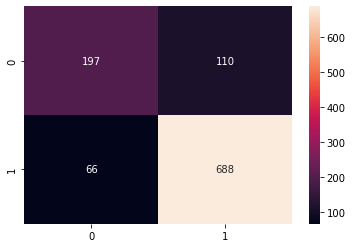

In [67]:
mx=sns.heatmap(metrics.confusion_matrix(y_train,y_train_predict),annot=True,fmt='d')

In [68]:
y_train_prob=Logistic_model.predict_proba(X_train)
pd.DataFrame(y_train_prob).head()

,0,1
0,0.933264,0.066736
1,0.095272,0.904728
2,0.293630,0.706370
3,0.112030,0.887970
4,0.016233,0.983767


AUC of LR model without Grid Search for Train Data is: 0.890
Logistic Model Score for Test Data 0.8289473684210527


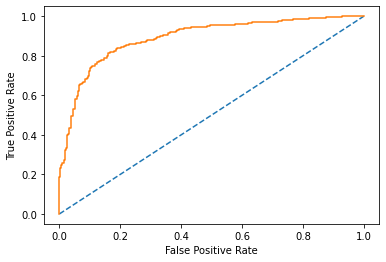

In [69]:
probs= Logistic_model.predict_proba(X_train)
# keep probabilities for the positive outcome only 
probs= probs[:,1]
# calculate AUC 
auc= roc_auc_score(y_train, probs)
print('AUC of LR model without Grid Search for Train Data is: %.3f' % auc)
# calculate roc curve 
train_fpr, train_tpr, train_thresholds= roc_curve(y_train, probs)
plt.plot([0,1], [0,1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

y_test_predict=Logistic_model.predict(X_test)
Logistic_model_score=Logistic_model.score(X_test,y_test)
print("Logistic Model Score for Test Data",Logistic_model_score)


In [70]:
y_test_predict=Logistic_model.predict(X_test)
Logistic_model_score=Logistic_model.score(X_test,y_test)
print("Logistic Model Score for Test Data",Logistic_model_score)

Logistic Model Score for Test Data 0.8289473684210527


In [71]:
y_test_predict=Logistic_model.predict(X_test)
Logistic_model_score=Logistic_model.score(X_test,y_test)
print(Logistic_model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8289473684210527
[[111  42]
 [ 36 267]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



AUC of LR model without Grid Search for Test Data is: 0.883


Text(0.5, 1.0, 'Figure 10.2: AUC-ROC Test Data-LR Model without GridSearch ')

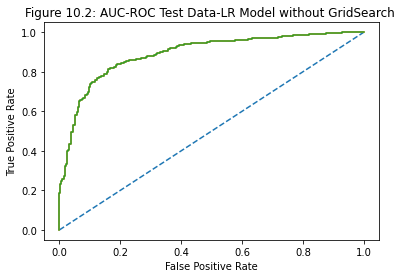

In [72]:
probs_test= Logistic_model.predict_proba(X_test)

probs_test= probs_test[:,1]

auc= roc_auc_score(y_test, probs_test)
print('AUC of LR model without Grid Search for Test Data is: %.3f' % auc)
test_fpr, test_tpr, test_thresholds= roc_curve(y_test, probs_test)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr, train_tpr);
plt.plot(train_fpr, train_tpr);
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Figure 10.2: AUC-ROC Test Data-LR Model without GridSearch ")

In [73]:
from  sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [74]:
LDA_model=LinearDiscriminantAnalysis()
LDA_model.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LinearDiscriminantAnalysis()

In [75]:
y_train_predict=LDA_model.predict(X_train)
LDA_model_score=LDA_model.score(X_train,y_train)
print("LDA Model Score for Training Data without GridSearch is",LDA_model_score)

LDA Model Score for Training Data without GridSearch is 0.8341187558906692


In [76]:
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

[[200 107]
 [ 69 685]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



# Confusion matrix of LDA model on Train data

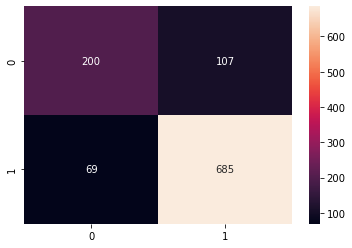

In [77]:
ht=sns.heatmap(metrics.confusion_matrix(y_train,y_train_predict),annot=True,fmt='d')

the auc curve for train 0.890 


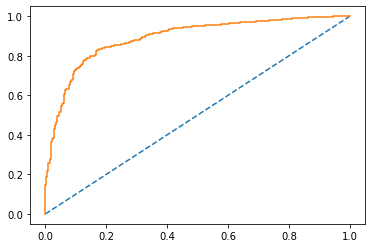

In [78]:
probs_train=LDA_model.predict_proba(X_train)
probs_train=probs_train[:,1]
auc=roc_auc_score(y_train,probs_train)
print("the auc curve for train %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr)

In [79]:
y_test_predict=LDA_model.predict(X_test)
LDA_model_score=LDA_model.score(X_test,y_test)
print("LDA Model Score for Test Data is",LDA_model_score)

LDA Model Score for Test Data is 0.831140350877193


In [80]:
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

[[111  42]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



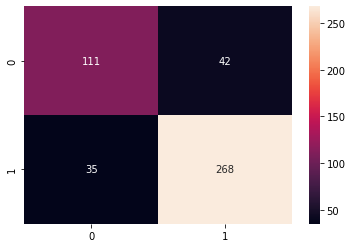

In [81]:
htt=sns.heatmap(metrics.confusion_matrix(y_test,y_test_predict),annot=True,fmt='d')

the auc curve for test 0.888 


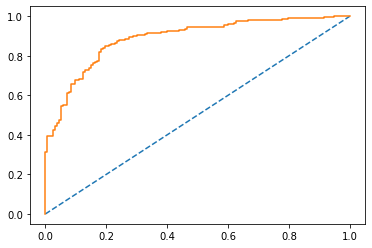

In [82]:
probs_test=LDA_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve for test %.3f " % auc)
test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

# Question 1.5

# Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences ofeach model (2 pts). Successful implementation of each model. Logical reasonbehind the selection of diﬀerent values for the parameters involved in eachmodel. Calculate Train and Test Accuracies for each model. Comment on thevalidness of models (over ﬁtting or under ﬁtting)

# Answer

In [83]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [84]:
NB_model=GaussianNB()
NB_model.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [85]:
y_train_predict=NB_model.predict(X_train)
NB_model_score=NB_model.score(X_train, y_train)
NB_model_score

0.8341187558906692

In [86]:
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

[[212  95]
 [ 81 673]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.71       307
           1       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



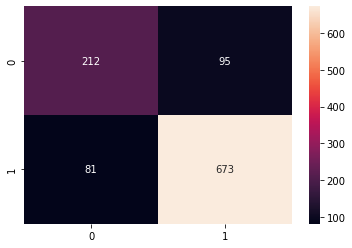

In [87]:
mt=sns.heatmap(metrics.confusion_matrix(y_train,y_train_predict),annot=True,fmt='d')

the auc cure for training set 0.889 


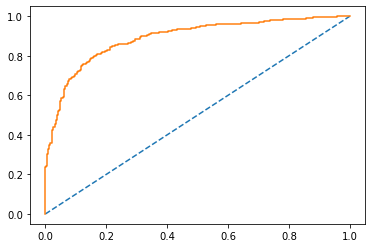

In [88]:
probs_train=NB_model.predict_proba(X_train)
probs_train=probs_train[:,1]
auc=roc_auc_score(y_train,probs_train)
print("the auc cure for training set %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr)

In [89]:
y_test_predict=NB_model.predict(X_test)
NB_model_score=NB_model.score(X_test, y_test)
NB_model_score

0.8223684210526315

In [90]:
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



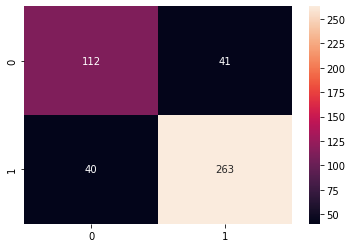

In [91]:
mt=sns.heatmap(metrics.confusion_matrix(y_test,y_test_predict),annot=True,fmt='d')

the auc cure for testing set 0.876 


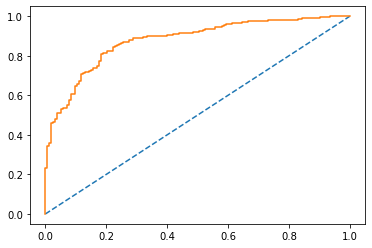

In [92]:
probs_test=NB_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc cure for testing set %.3f " % auc)
test_fpr ,test_tpr, test_thresholds= roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr,test_tpr)

# KNN model

In [93]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [94]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3.0,3.0,4,1,2,2,female
1,Labour,36,4.0,4.0,4,4,5,2,male
2,Labour,35,4.0,4.0,5,2,3,2,male
3,Labour,24,4.0,2.0,2,1,4,0,female
4,Labour,41,2.0,2.0,1,1,6,2,male


Text(0.5, 1.0, 'Independent Variable Plot Before Scaling')

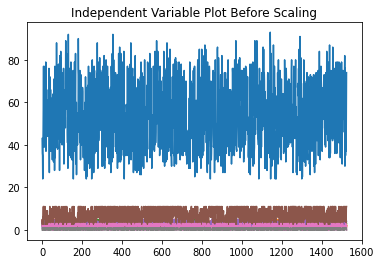

In [95]:
plt.plot(X)
plt.title("Independent Variable Plot Before Scaling")

In [96]:
X[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge']].apply(zscore)

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
0,-0.716161,-0.301648,-0.179682,0.565802,-1.419969,-1.437338,0.423832
1,-1.162118,0.870183,0.949003,0.565802,1.014951,-0.527684,0.423832
2,-1.225827,0.870183,0.949003,1.417312,-0.608329,-1.134120,0.423832
3,-1.926617,0.870183,-1.308366,-1.137217,-1.419969,-0.830902,-1.421084
4,-0.843577,-1.473479,-1.308366,-1.988727,-1.419969,-0.224465,0.423832
...,...,...,...,...,...,...,...
1520,0.812836,2.042014,-0.179682,-1.137217,1.014951,1.291625,1.346290
1521,1.195085,-1.473479,-1.308366,0.565802,1.014951,0.381971,0.423832
1522,-1.098410,-0.301648,-0.179682,1.417312,1.014951,-1.437338,0.423832
1523,0.430587,-0.301648,-0.179682,-1.988727,1.014951,1.291625,0.423832


Text(0.5, 1.0, 'Figure 16:Independent Variable Plot Prior Scaling')

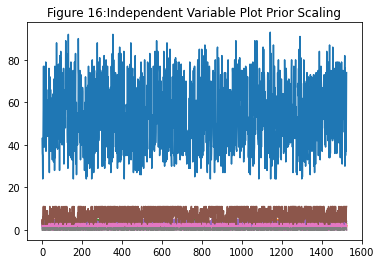

In [97]:
plt.plot(X)
plt.title("Figure 16:Independent Variable Plot Prior Scaling")

In [98]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,43,3.0,3.0,4,1,2,2,0
1,36,4.0,4.0,4,4,5,2,1
2,35,4.0,4.0,5,2,3,2,1
3,24,4.0,2.0,2,1,4,0,0
4,41,2.0,2.0,1,1,6,2,1


In [99]:
from  sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [100]:
y_train_predict=KNN_model.predict(X_train)
KNN_model_score=KNN_model.score(X_train,y_train)
KNN_model_score

0.8539114043355325

In [101]:
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

[[204 103]
 [ 52 702]]
              precision    recall  f1-score   support

           0       0.80      0.66      0.72       307
           1       0.87      0.93      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



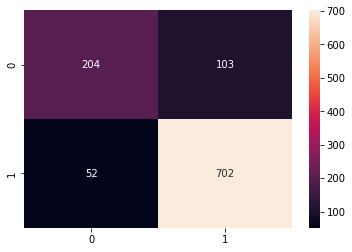

In [102]:
mx=sns.heatmap(metrics.confusion_matrix(y_train,y_train_predict),annot=True, fmt='d')

the auc 0.923 


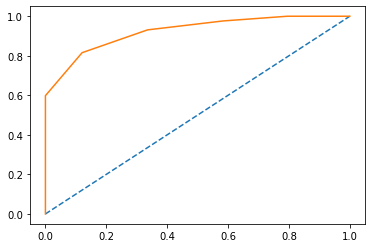

In [103]:
probs_train=KNN_model.predict_proba(X_train)
probs_train=probs_train[:,1]
auc=roc_auc_score(y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr)

In [104]:
y_test_predict=KNN_model.predict(X_test)
KNN_model_score=KNN_model.score(X_test, y_test)
KNN_model_score

0.8157894736842105

In [105]:
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

[[ 99  54]
 [ 30 273]]
              precision    recall  f1-score   support

           0       0.77      0.65      0.70       153
           1       0.83      0.90      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.77      0.78       456
weighted avg       0.81      0.82      0.81       456



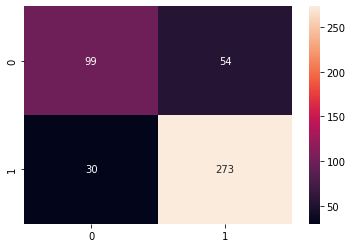

In [106]:
mx=sns.heatmap(metrics.confusion_matrix(y_test,y_test_predict),annot=True,fmt='d')

the auc curve for testinf data 0.853 


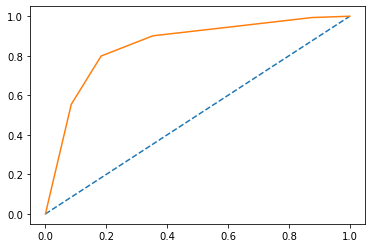

In [107]:
probs_test=KNN_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve for testinf data %.3f " % auc)
test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

In [108]:
KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [109]:
y_train_predict=KNN_model.predict(X_train)
KNN_model_score=KNN_model.score(X_train,y_train)
KNN_model_score

0.8482563619227145

In [110]:
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

[[202 105]
 [ 56 698]]
              precision    recall  f1-score   support

           0       0.78      0.66      0.72       307
           1       0.87      0.93      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.79      0.81      1061
weighted avg       0.84      0.85      0.84      1061



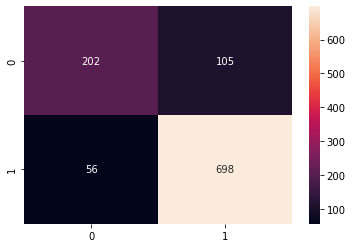

In [111]:
mx=sns.heatmap(metrics.confusion_matrix(y_train,y_train_predict),annot=True,fmt='d')

the auc 0.918 


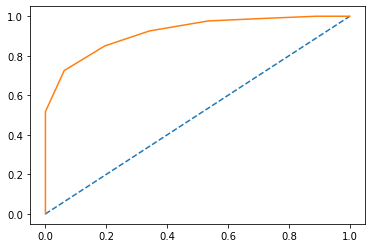

In [112]:
probs_train=KNN_model.predict_proba(X_train)
probs_train=probs_train[:,1]
auc=roc_auc_score(y_train,probs_train)
print("the auc %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr)

In [113]:
y_test_predict=KNN_model.predict(X_test)
KNN_model_score=KNN_model.score(X_test, y_test)
KNN_model_score

0.8245614035087719

In [114]:
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

[[ 99  54]
 [ 26 277]]
              precision    recall  f1-score   support

           0       0.79      0.65      0.71       153
           1       0.84      0.91      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



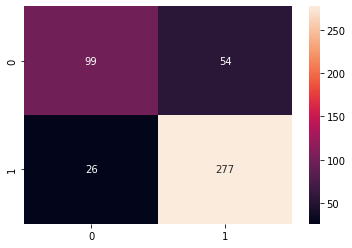

In [115]:
ax=sns.heatmap(metrics.confusion_matrix(y_test,y_test_predict),annot=True, fmt='d')

the auc curve 0.861 


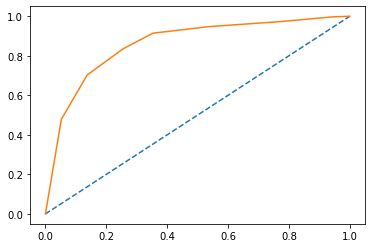

In [116]:
probs_test=KNN_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve %.3f " % auc)
test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

# to find more value of K we need to do (MCE)
# Misclassiﬁcation error(MCE) = 1 - Test accuracy score

In [117]:
ac_score=[]
for k in range(1,20,2): 
    knn= KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
    scores=knn.score(X_test,y_test) 
    ac_score.append(scores) 
MCE=[1-x for x in ac_score]
MCE

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

[0.2192982456140351,
 0.21052631578947367,
 0.1842105263157895,
 0.17543859649122806,
 0.19298245614035092,
 0.19517543859649122,
 0.19736842105263153,
 0.19298245614035092,
 0.20175438596491224,
 0.19517543859649122]

In [118]:
ac_score

[0.7807017543859649,
 0.7894736842105263,
 0.8157894736842105,
 0.8245614035087719,
 0.8070175438596491,
 0.8048245614035088,
 0.8026315789473685,
 0.8070175438596491,
 0.7982456140350878,
 0.8048245614035088]

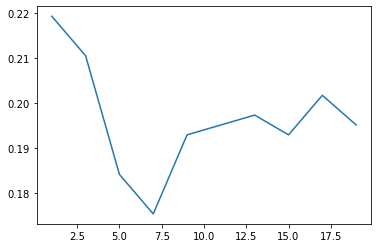

In [119]:
plt.plot(range(1,20,2), MCE)

# Question 1.6

# Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply gridsearch on each model (include all models) and make models on best_params.Deﬁne a logic behind choosing particular values for diﬀerent hyper-parametersfor grid search. Compare and comment on performances of all. Comment onfeature importance if applicable. Successful implementation of both algorithmsalong with inferences and comments on the model performances

# Answer

In [120]:
param_grid_NB= { 'var_smoothing': np.logspace(0,-9, num =100)}

In [121]:
NB_model_grid= GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_NB)
NB_model_grid.fit(X_train, y_train)
print(NB_model_grid.best_estimator_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

GaussianNB(var_smoothing=0.001)


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

In [122]:
y_train_predict=NB_model_grid.predict(X_train)
NB_model_grid_score=NB_model.score(X_train, y_train)
NB_model_grid_score

0.8341187558906692

In [123]:
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

[[210  97]
 [ 76 678]]
              precision    recall  f1-score   support

           0       0.73      0.68      0.71       307
           1       0.87      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.84      1061



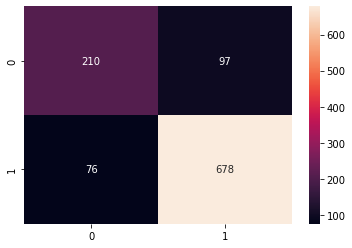

In [124]:
ax=sns.heatmap(metrics.confusion_matrix(y_train,y_train_predict),annot=True,fmt='d')

AUC of NB Model with GridSearch is 0.888 


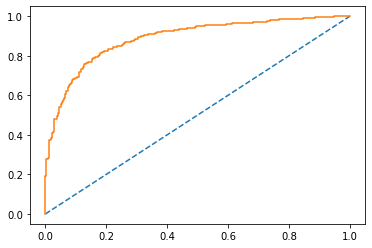

In [125]:
probs_train=NB_model_grid.predict_proba(X_train)
probs_train=probs_train[:,1]
auc=roc_auc_score(y_train,probs_train)
print("AUC of NB Model with GridSearch is %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(train_fpr,train_tpr)

In [126]:
y_test_predict=NB_model_grid.predict(X_test)
NB_model_grid_score=NB_model.score(X_test, y_test)
NB_model_grid_score

0.8223684210526315

In [127]:
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

[[111  42]
 [ 37 266]]
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



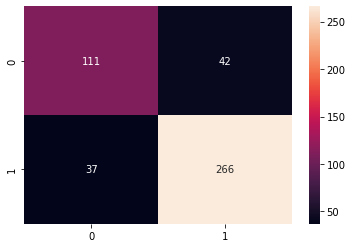

In [128]:
mx=sns.heatmap(metrics.confusion_matrix(y_test,y_test_predict),annot=True,fmt='d')

AUC of NB Model with GridSearch is 0.879 


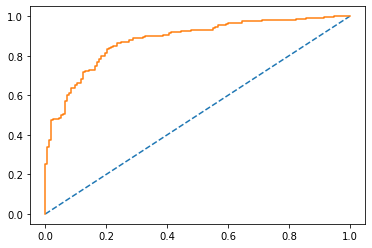

In [129]:
probs_test=NB_model_grid.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("AUC of NB Model with GridSearch is %.3f " % auc)
test_fpr ,test_tpr, test_thresholds= roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr,test_tpr)

In [130]:
from  sklearn.ensemble import BaggingClassifier
from  sklearn.tree import DecisionTreeClassifier

In [131]:
cart=DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100, random_state=1)
Bagging_model.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [132]:
y_train_predict=Bagging_model.predict(X_train)
Bagging_model_score=Bagging_model.score(X_train,y_train)
Bagging_model_score

1.0

In [133]:
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



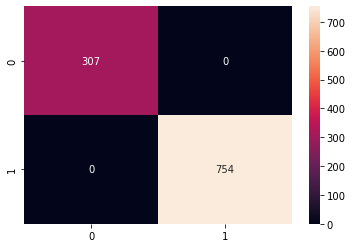

In [134]:
ax=sns.heatmap(metrics.confusion_matrix(y_train,y_train_predict),annot=True, fmt='d')

AUC: 1.000


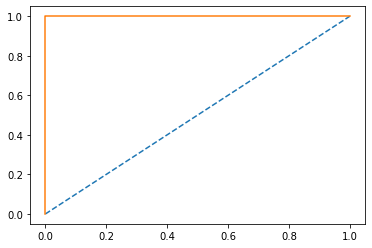

In [135]:
probs= Bagging_model.predict_proba(X_train)
probs= probs[:,1]
auc= roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds= roc_curve(y_train, probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr, train_tpr)

In [136]:
y_test_predict=Bagging_model.predict(X_test)
Bagging_model_score=Bagging_model.score(X_test,y_test)
Bagging_model_score

0.8201754385964912

In [137]:
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

[[108  45]
 [ 37 266]]
              precision    recall  f1-score   support

           0       0.74      0.71      0.72       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



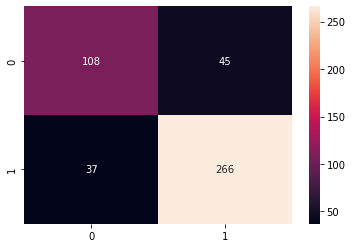

In [138]:
mx=sns.heatmap(metrics.confusion_matrix(y_test,y_test_predict),annot=True,fmt='d')

AUC: 0.881


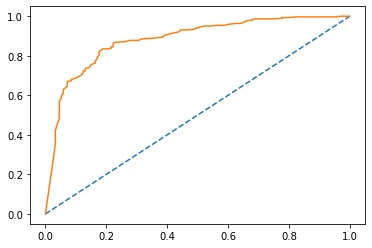

In [139]:
probs_test= Bagging_model.predict_proba(X_test)
probs_test= probs_test[:,1]
auc= roc_auc_score(y_test, probs_test)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds= roc_curve(y_test, probs_test)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr, test_tpr)

In [140]:
from  sklearn.ensemble import AdaBoostClassifier

In [141]:
ADB_model=AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AdaBoostClassifier(n_estimators=100, random_state=1)

In [142]:
y_train_predict=ADB_model.predict(X_train)
ADB_model_score=ADB_model.score(X_train,y_train)
ADB_model_score

0.8501413760603205

In [143]:
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))


[[214  93]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



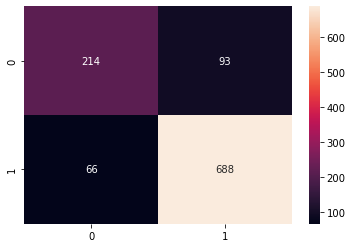

In [144]:
mx=sns.heatmap(metrics.confusion_matrix(y_train,y_train_predict),annot=True,fmt='d')

AUC: 0.915


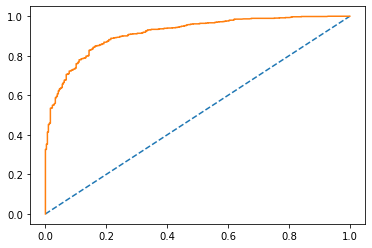

In [145]:
probs= ADB_model.predict_proba(X_train)
probs= probs[:,1]
auc= roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds= roc_curve(y_train, probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr, train_tpr)

In [146]:
y_test_predict=ADB_model.predict(X_test)
ADB_model_score=ADB_model.score(X_test,y_test)
ADB_model_score

0.8135964912280702

In [147]:
print(metrics.confusion_matrix(y_test,y_test_predict))

print(metrics.classification_report(y_test,y_test_predict))

[[103  50]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



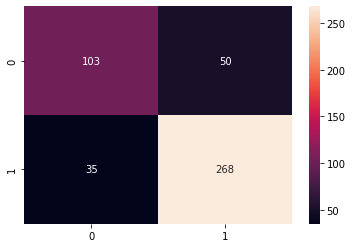

In [148]:
mx=sns.heatmap(metrics.confusion_matrix(y_test,y_test_predict),annot=True, fmt='d')

AUC: 0.877


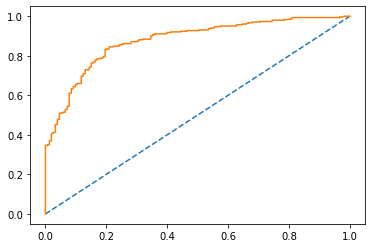

In [149]:
probs= ADB_model.predict_proba(X_test)
probs= probs[:,1]
auc= roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds= roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr, test_tpr)

# Question 1.7

# Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)

In [150]:
model=LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.3s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

# Predicting on Training and Test Dataset

In [151]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

# model Evaluation

In [152]:
# accuarcy - training data
model.score(X_train,y_train)

0.8341187558906692

In [153]:
# accuarcy - testing data
model.score(X_test,y_test)

0.8289473684210527

# AUC ROC for trainig data

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [155]:
probs=model.predict_proba(X_train)

AUC: 0.890


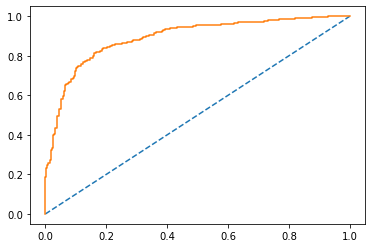

In [156]:
probs= model.predict_proba(X_train)
probs= probs[:,1]
auc= roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds= roc_curve(y_train, probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr, train_tpr)

# AUC and ROC for test data

In [157]:
probs=model.predict_proba(X_test)

AUC: 0.883


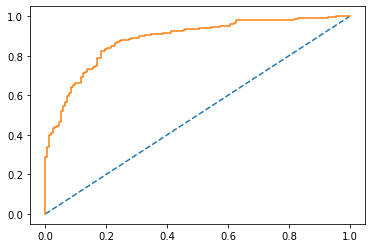

In [158]:
probs= model.predict_proba(X_test)
probs= probs[:,1]
auc= roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds= roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr, test_tpr)

# confusion matrix on training data

In [159]:
confusion_matrix(y_train,y_train_predict)

array([[197, 110],
       [ 66, 688]], dtype=int64)

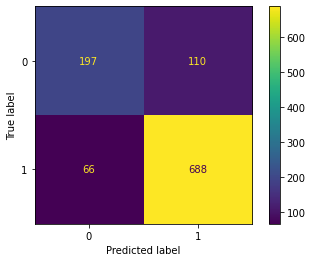

In [160]:
plot_confusion_matrix(model,X_train,y_train)

# Confusion matrix for test data

In [161]:
confusion_matrix(y_test,y_test_predict)

array([[111,  42],
       [ 36, 267]], dtype=int64)

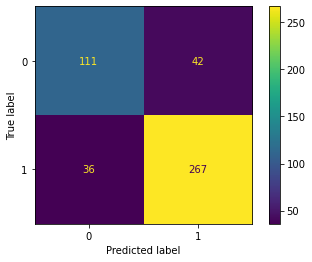

In [162]:
plot_confusion_matrix(model,X_test,y_test)

# classification report on training data

In [163]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



# classification report on testing data

In [164]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



# LDA model

In [165]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [166]:
pred_class_train = model.predict(X_train)
pred_class_test = model.predict(X_test)

In [167]:
print('classification report of training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('classification report of testing data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')


classification report of training data:

               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

classification report of testing data:

               precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



In [168]:
pred_prob_train = model.predict(X_train)

preed_prob_test = model.predict(X_test)

In [169]:
y_train_predict = model.predict(X_train)

y_test_predict = model.predict(X_test)

In [170]:
model.score(X_train,y_train)

0.8341187558906692

In [171]:
model.score(X_test,y_test)

0.831140350877193

AUC: 0.890


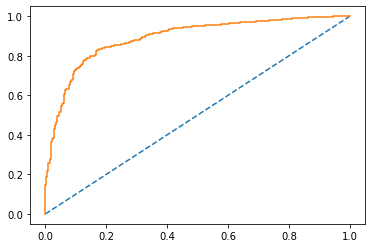

In [172]:
probs= model.predict_proba(X_train)
probs= probs[:,1]
auc= roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds= roc_curve(y_train, probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(train_fpr, train_tpr)


AUC: 0.888


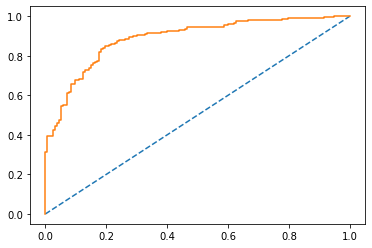

In [173]:
probs= model.predict_proba(X_test)
probs= probs[:,1]
auc= roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
test_fpr, test_tpr, test_thresholds= roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(test_fpr, test_tpr)

# Question 1.8

# Based on these predictions, what are the insights? (5 marks)


#1.Comparing all the performance measure, Naïve Bayes model from second iteration isperforming best. Although there are some other models such as SVM and Extreme Boostingwhich is performing almost same as that of Naïve Bayes. But Naïve Bayes model is veryconsistent when train and test results are compared with each other. Along with otherparameters such as Recall value, AUC_SCORE and AUC_ROC_Curve, those results werepretty good is this model.
print('/n)print('/n)
#2)Labour party is performing better than Conservative from huge margin.
print('/n)
#3)Female voters turn out is greater than the male voters.
print('/n)
#4)Those who have better national economic conditions are preferring to vote for Labour party.
print('/n)
#5)Persons having higher Eurosceptic sentiments conservative party are preferring to vote forConservative party.
print('/n)
#6)Those who have higher political knowledge have voted for Conservative party7)Looking at the assessment for both the leaders, Labour Leader is performing well as he hasgot better ratings in assessment

# Problem 2

# In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

# 1.President Franklin D. Roosevelt in 1941
# 2.President John F. Kennedy in 1961
# 3.President Richard Nixon in 1973
(Hint: use .words(), .raw(), .sent() for extracting counts)

In [174]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
import string
import matplotlib


In [175]:
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Regular Expression version:',re.__version__)
print('Natural Language Tool Kit version:',nltk.__version__)
print('Matplotlib version:',matplotlib.__version__)

Numpy version: 1.20.3
Pandas version: 1.3.4
Regular Expression version: 2.2.1
Natural Language Tool Kit version: 3.6.5
Matplotlib version: 3.4.3


In [176]:
import nltk
nltk.download('inaugural')
from  nltk.corpus import inaugural

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


# Question 2.1

# Find the number of characters, words and sentences for the mentioneddocuments. 

# For President Franklin D. Roosevelt in 1941

In [177]:
inaugural.raw('1941-Roosevelt.txt')

'On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.\n\nIn Washington\'s day the task of the people was to create and weld together a nation.\n\nIn Lincoln\'s day the task of the people was to preserve that Nation from disruption from within.\n\nIn this day the task of the people is to save that Nation and its institutions from disruption from without.\n\nTo us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.\n\nLives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.\n\nThere are men who doubt this. There are men who believe that democr

In [178]:
df_Roosevelt=inaugural.raw('1941-Roosevelt.txt')

In [179]:
type(df_Roosevelt)

str

In [180]:
split_df_Roosevelt= df_Roosevelt.split('\n\n')

In [181]:
type(split_df_Roosevelt)

list

In [182]:
df_text_Roosevelt= pd.DataFrame(split_df_Roosevelt)

In [183]:
df_text_Roosevelt.columns=['speech']

In [184]:
df_text_Roosevelt.head()

,speech
0,On each national day of inauguration since 178...
1,In Washington's day the task of the people was...
2,In Lincoln's day the task of the people was to...
3,In this day the task of the people is to save ...
4,"To us there has come a time, in the midst of s..."


In [185]:
df_text_Roosevelt.tail()

,speech
33,The destiny of America was proclaimed in words...
34,If we lose that sacred fire--if we let it be s...
35,In the face of great perils never before encou...
36,"For this we muster the spirit of America, and ..."
37,We do not retreat. We are not content to stand...


In [186]:
df_text_Roosevelt.shape




(38, 1)

In [187]:
df_text_Roosevelt['word_count']=df_text_Roosevelt['speech'].apply(lambda x:len(str(x).split()))
df_text_Roosevelt[['speech','word_count']].head()

,speech,word_count
0,On each national day of inauguration since 178...,20
1,In Washington's day the task of the people was...,16
2,In Lincoln's day the task of the people was to...,17
3,In this day the task of the people is to save ...,20
4,"To us there has come a time, in the midst of s...",53


In [188]:
all_words_Roosevelt= inaugural.words('1941-Roosevelt.txt')
length_all_words_Roosevelt=len(all_words_Roosevelt)
length_all_words_Roosevelt

1536

In [189]:
df_text_Roosevelt.shape

(38, 2)

In [190]:
df_text_Roosevelt['char_count']= df_text_Roosevelt['speech'].str.len()
df_text_Roosevelt[['speech','char_count']].head()

,speech,char_count
0,On each national day of inauguration since 178...,120
1,In Washington's day the task of the people was...,84
2,In Lincoln's day the task of the people was to...,96
3,In this day the task of the people is to save ...,108
4,"To us there has come a time, in the midst of s...",248


In [191]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [192]:
inaugural.sents('1941-Roosevelt.txt')

[['On', 'each', 'national', 'day', 'of', 'inauguration', 'since', '1789', ',', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'United', 'States', '.'], ['In', 'Washington', "'", 's', 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'create', 'and', 'weld', 'together', 'a', 'nation', '.'], ...]

In [193]:
all_sents_Roosevelt= inaugural.sents('1941-Roosevelt.txt')
length_all_sents_Roosevelt=len(all_sents_Roosevelt)

length_all_sents_Roosevelt

68

In [194]:
df_text_Roosevelt['sent_count']= df_text_Roosevelt['speech'].str.len()
df_text_Roosevelt[['speech','sent_count']].head()

,speech,sent_count
0,On each national day of inauguration since 178...,120
1,In Washington's day the task of the people was...,84
2,In Lincoln's day the task of the people was to...,96
3,In this day the task of the people is to save ...,108
4,"To us there has come a time, in the midst of s...",248


In [195]:
def avg_word(sentence): 
    words= sentence.split() 
    return (sum (len(word)for word in words)/len(words))
df_text_Roosevelt['avg_word']= df_text_Roosevelt['speech'].apply(lambda x: avg_word(x))
df_text_Roosevelt[['speech','avg_word']].head()


,speech,avg_word
0,On each national day of inauguration since 178...,5.050000
1,In Washington's day the task of the people was...,4.312500
2,In Lincoln's day the task of the people was to...,4.705882
3,In this day the task of the people is to save ...,4.450000
4,"To us there has come a time, in the midst of s...",3.698113


# President John F.Kennedy in 1961

In [196]:
inaugural.raw('1961-Kennedy.txt')

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [197]:
df_Kennedy=inaugural.raw('1961-Kennedy.txt')

In [198]:
type(df_Kennedy)

str

In [199]:
split_df_Kennedy= df_Kennedy.split('\n\n')

In [200]:
type(split_df_Kennedy)

list

In [201]:
df_text_Kennedy= pd.DataFrame(split_df_Kennedy)

In [202]:
df_text_Kennedy.columns=['speech']


In [203]:
df_text_Kennedy.head(
)

,speech
0,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
1,The world is very different now. For man holds...
2,We dare not forget today that we are the heirs...
3,"Let every nation know, whether it wishes us we..."
4,This much we pledge -- and more.


In [204]:
df_text_Kennedy.tail()


,speech
22,Can we forge against these enemies a grand and...
23,"In the long history of the world, only a few g..."
24,"And so, my fellow Americans: ask not what your..."
25,My fellow citizens of the world: ask not what ...
26,"Finally, whether you are citizens of America o..."


In [205]:
df_text_Kennedy.shape

(27, 1)

In [206]:
inaugural.words('1961-Kennedy.txt')

['Vice', 'President', 'Johnson', ',', 'Mr', '.', ...]

In [207]:
len(inaugural.words('1961-Kennedy.txt')
   
   
   
   
   )

1546

In [208]:
df_text_Kennedy['word_count']= df_text_Kennedy['speech'].apply(lambda x:len(str(x).split()))
df_text_Kennedy[['speech','word_count']].head()

,speech,word_count
0,"Vice President Johnson, Mr. Speaker, Mr. Chief...",73
1,The world is very different now. For man holds...,68
2,We dare not forget today that we are the heirs...,96
3,"Let every nation know, whether it wishes us we...",40
4,This much we pledge -- and more.,7


In [209]:
all_words_Kennedy= inaugural.words('1961-Kennedy.txt')
length_all_words_Kennedy=len(all_words_Kennedy)
length_all_words_Kennedy

1546

In [210]:
df_text_Kennedy['char_count']= df_text_Kennedy['speech'].str.len()
df_text_Kennedy[['speech','char_count']].head()

,speech,char_count
0,"Vice President Johnson, Mr. Speaker, Mr. Chief...",445
1,The world is very different now. For man holds...,355
2,We dare not forget today that we are the heirs...,512
3,"Let every nation know, whether it wishes us we...",217
4,This much we pledge -- and more.,32


In [211]:
inaugural.sents('1961-Kennedy.txt')

[['Vice', 'President', 'Johnson', ',', 'Mr', '.', 'Speaker', ',', 'Mr', '.', 'Chief', 'Justice', ',', 'President', 'Eisenhower', ',', 'Vice', 'President', 'Nixon', ',', 'President', 'Truman', ',', 'reverend', 'clergy', ',', 'fellow', 'citizens', ',', 'we', 'observe', 'today', 'not', 'a', 'victory', 'of', 'party', ',', 'but', 'a', 'celebration', 'of', 'freedom', '--', 'symbolizing', 'an', 'end', ',', 'as', 'well', 'as', 'a', 'beginning', '--', 'signifying', 'renewal', ',', 'as', 'well', 'as', 'change', '.'], ['For', 'I', 'have', 'sworn', 'I', 'before', 'you', 'and', 'Almighty', 'God', 'the', 'same', 'solemn', 'oath', 'our', 'forebears', 'l', 'prescribed', 'nearly', 'a', 'century', 'and', 'three', 'quarters', 'ago', '.'], ...]

In [212]:
all_sents_Kennedy= inaugural.sents('1961-Kennedy.txt')
length_all_sents_Kennedy=len(all_sents_Kennedy)

length_all_sents_Kennedy

52

In [213]:
df_text_Kennedy['sent_count']= df_text_Kennedy['speech'].str.len()
df_text_Kennedy[['speech','sent_count']].head()

,speech,sent_count
0,"Vice President Johnson, Mr. Speaker, Mr. Chief...",445
1,The world is very different now. For man holds...,355
2,We dare not forget today that we are the heirs...,512
3,"Let every nation know, whether it wishes us we...",217
4,This much we pledge -- and more.,32


In [214]:
def avg_word(sentence): 
    words= sentence.split() 
    return (sum (len(word)for word in words)/len(words))
df_text_Kennedy['avg_word']= df_text_Kennedy['speech'].apply(lambda x: avg_word(x))
df_text_Kennedy[['speech','avg_word']].head()

,speech,avg_word
0,"Vice President Johnson, Mr. Speaker, Mr. Chief...",5.109589
1,The world is very different now. For man holds...,4.235294
2,We dare not forget today that we are the heirs...,4.343750
3,"Let every nation know, whether it wishes us we...",4.450000
4,This much we pledge -- and more.,3.714286


# President Richard Nixon in 1973

In [215]:
inaugural.raw('1973-Nixon.txt')

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [216]:
df_Nixon=inaugural.raw('1973-Nixon.txt')

In [217]:
type(df_Nixon)

str

In [218]:
split_df_Nixon= df_Nixon.split('\n\n')

In [219]:
type(split_df_Nixon)

list

In [220]:
df_text_Nixon= pd.DataFrame(split_df_Nixon)

df_text_Nixon.columns=['speech']
df_text_Nixon.head()

,speech
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."
1,"When we met here four years ago, America was b..."
2,"As we meet here today, we stand on the thresho..."
3,The central question before us is: How shall w...
4,Let us resolve that this will be what it can b...


In [221]:
df_text_Nixon.tail()

,speech
46,"We shall answer to God, to history, and to our..."
47,"As I stand in this place, so hallowed by histo..."
48,"Today, I ask your prayers that in the years ah..."
49,Let us pledge together to make these next four...
50,"Let us go forward from here confident in hope,..."


In [222]:
df_text_Nixon.shape

(51, 1)

In [223]:
inaugural.words('1973-Nixon.txt')

['Mr', '.', 'Vice', 'President', ',', 'Mr', '.', ...]

In [224]:
len(inaugural.words('1973-Nixon.txt'))

2028

In [225]:
df_text_Nixon['word_count']= df_text_Nixon['speech'].apply(lambda x:len(str(x).split()))
df_text_Nixon[['speech','word_count']].head()


,speech,word_count
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",25
1,"When we met here four years ago, America was b...",27
2,"As we meet here today, we stand on the thresho...",19
3,The central question before us is: How shall w...,51
4,Let us resolve that this will be what it can b...,38


In [226]:
all_words_Nixon= inaugural.words('1973-Nixon.txt')
length_all_words_Nixon=len(all_words_Nixon)
length_all_words_Nixon

2028

In [227]:
df_text_Nixon['char_count']= df_text_Nixon['speech'].str.len()
df_text_Nixon[['speech','char_count']].head()

,speech,char_count
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",155
1,"When we met here four years ago, America was b...",156
2,"As we meet here today, we stand on the thresho...",84
3,The central question before us is: How shall w...,269
4,Let us resolve that this will be what it can b...,199


In [228]:
inaugural.sents('1973-Nixon.txt')

[['Mr', '.', 'Vice', 'President', ',', 'Mr', '.', 'Speaker', ',', 'Mr', '.', 'Chief', 'Justice', ',', 'Senator', 'Cook', ',', 'Mrs', '.', 'Eisenhower', ',', 'and', 'my', 'fellow', 'citizens', 'of', 'this', 'great', 'and', 'good', 'country', 'we', 'share', 'together', ':'], ['When', 'we', 'met', 'here', 'four', 'years', 'ago', ',', 'America', 'was', 'bleak', 'in', 'spirit', ',', 'depressed', 'by', 'the', 'prospect', 'of', 'seemingly', 'endless', 'war', 'abroad', 'and', 'of', 'destructive', 'conflict', 'at', 'home', '.'], ...]

In [229]:
all_sents_Nixon= inaugural.sents('1973-Nixon.txt')
length_all_sents_Nixon=len(all_sents_Nixon)


length_all_sents_Nixon

69

In [230]:
def avg_word(sentence): 
    words= sentence.split() 
    return (sum (len(word)for word in words)/len(words))
df_text_Nixon['avg_word']= df_text_Nixon['speech'].apply(lambda x: avg_word(x))
df_text_Nixon[['speech','avg_word']].head()

,speech,avg_word
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",5.240000
1,"When we met here four years ago, America was b...",4.814815
2,"As we meet here today, we stand on the thresho...",3.473684
3,The central question before us is: How shall w...,4.294118
4,Let us resolve that this will be what it can b...,4.263158


# Question 2.2

# Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.

In [231]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# President Franklin D. Roosevelt in 1941

In [232]:
all_Words_Roosevelt=[x for x in pd.Series(' '.join(df_text_Roosevelt['speech']).split())]

In [233]:
nltk.FreqDist(all_Words_Roosevelt).most_common(10)

[('the', 104),
 ('of', 81),
 ('and', 41),
 ('to', 35),
 ('in', 30),
 ('a', 28),
 ('is', 24),
 ('--', 22),
 ('we', 22),
 ('that', 21)]

In [234]:
stopwords_Roosevelt= nltk.corpus.stopwords.words('english')+list(string.punctuation)

In [235]:
all_words_Roosevelt= (x.lower()for x in all_Words_Roosevelt)

In [236]:
all_words_clean_Roosevelt= [word for word in all_words_Roosevelt if word not in stopwords_Roosevelt]

In [237]:
all_words_freq_Roosevelt= nltk.FreqDist(all_words_clean_Roosevelt)

In [238]:
word_features_Roosevelt= [item[0]for item in all_words_freq_Roosevelt.most_common(2000)]

In [239]:
print(word_features_Roosevelt)

['--', 'know', 'us', 'life', 'people', 'nation', 'human', 'years', 'freedom', 'democracy', 'spirit', 'speaks', 'day', 'men', 'new', 'nation,', 'body', 'must', 'something', 'faith', 'america', 'united', 'states.', 'task', 'nations', 'spirit.', 'government', 'future', 'democracy.', 'every', 'continent', 'like', 'person,', 'sacred', 'came', 'first', 'destiny', 'national', 'sense', 'create', 'together', 'nation.', 'disruption', 'come', 'midst', 'stock', 'may', 'lives', 'little', 'measure', 'live.', 'doubt', 'measured', 'true.', 'republic', 'security', 'and,', 'many', 'built', 'within', 'constitution', 'american', 'seen', 'cannot', 'enterprise', 'free', 'forms', 'still', 'mind', 'hopes', 'find', 'even', 'upon', 'america.', 'early', 'history.', 'written', 'could', 'enough', 'mind,', 'would', 'words', 'preservation', 'inauguration', 'since', '1789,', 'renewed', 'dedication', "washington's", 'weld', "lincoln's", 'preserve', 'within.', 'save', 'institutions', 'without.', 'time,', 'swift', 'happ

In [240]:
all_words_freq_Roosevelt

FreqDist({'--': 22, 'know': 9, 'us': 8, 'life': 6, 'people': 5, 'nation': 5, 'human': 5, 'years': 5, 'freedom': 5, 'democracy': 5, ...})

In [241]:
print(stopwords_Roosevelt)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [242]:
word_features_Roosevelt

['--',
 'know',
 'us',
 'life',
 'people',
 'nation',
 'human',
 'years',
 'freedom',
 'democracy',
 'spirit',
 'speaks',
 'day',
 'men',
 'new',
 'nation,',
 'body',
 'must',
 'something',
 'faith',
 'america',
 'united',
 'states.',
 'task',
 'nations',
 'spirit.',
 'government',
 'future',
 'democracy.',
 'every',
 'continent',
 'like',
 'person,',
 'sacred',
 'came',
 'first',
 'destiny',
 'national',
 'sense',
 'create',
 'together',
 'nation.',
 'disruption',
 'come',
 'midst',
 'stock',
 'may',
 'lives',
 'little',
 'measure',
 'live.',
 'doubt',
 'measured',
 'true.',
 'republic',
 'security',
 'and,',
 'many',
 'built',
 'within',
 'constitution',
 'american',
 'seen',
 'cannot',
 'enterprise',
 'free',
 'forms',
 'still',
 'mind',
 'hopes',
 'find',
 'even',
 'upon',
 'america.',
 'early',
 'history.',
 'written',
 'could',
 'enough',
 'mind,',
 'would',
 'words',
 'preservation',
 'inauguration',
 'since',
 '1789,',
 'renewed',
 'dedication',
 "washington's",
 'weld',
 "linc

In [243]:
df_text_Roosevelt['speech']=df_text_Roosevelt['speech'].apply(lambda x:" ".join(x.lower() for x in x.split()))
df_text_Roosevelt[['speech']].head()


,speech
0,on each national day of inauguration since 178...
1,in washington's day the task of the people was...
2,in lincoln's day the task of the people was to...
3,in this day the task of the people is to save ...
4,"to us there has come a time, in the midst of s..."


In [244]:
df_text_Roosevelt['speech']=df_text_Roosevelt['speech'].str.replace('[^\w\s]','')

df_text_Roosevelt[['speech']].head()

C:\Users\User\AppData\Local\Temp/ipykernel_10772/2094363281.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_text_Roosevelt['speech']=df_text_Roosevelt['speech'].str.replace('[^\w\s]','')


,speech
0,on each national day of inauguration since 178...
1,in washingtons day the task of the people was ...
2,in lincolns day the task of the people was to ...
3,in this day the task of the people is to save ...
4,to us there has come a time in the midst of sw...


In [245]:
df_text_Roosevelt['word_count']= df_text_Roosevelt['speech'].apply(lambda x:len(str(x).split()))
                                                                                
df_text_Roosevelt[['speech','word_count']].head()

,speech,word_count
0,on each national day of inauguration since 178...,20
1,in washingtons day the task of the people was ...,16
2,in lincolns day the task of the people was to ...,17
3,in this day the task of the people is to save ...,20
4,to us there has come a time in the midst of sw...,52


In [246]:
from  nltk.corpus import stopwords
stop= stopwords.words('english')
df_text_Roosevelt['speech']= df_text_Roosevelt['speech'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))
df_text_Roosevelt[['speech']].head()

,speech
0,national day inauguration since 1789 people re...
1,washingtons day task people create weld togeth...
2,lincolns day task people preserve nation disru...
3,day task people save nation institutions disru...
4,us come time midst swift happenings pause mome...


In [247]:
df_text_Roosevelt['word_count']= df_text_Roosevelt['speech'].apply(lambda x:len(str(x).split()))
df_text_Roosevelt[['speech','word_count']].head()

,speech,word_count
0,national day inauguration since 1789 people re...,11
1,washingtons day task people create weld togeth...,8
2,lincolns day task people preserve nation disru...,8
3,day task people save nation institutions disru...,8
4,us come time midst swift happenings pause mome...,19


In [248]:
df_text_Roosevelt['speech'][0]

'national day inauguration since 1789 people renewed sense dedication united states'

# President John F. Kennedy in 1961:

In [249]:
all_Words_Kennedy=[x for x in pd.Series(' '.join(df_text_Kennedy['speech']).split())]

In [250]:
nltk.FreqDist(all_Words_Kennedy).most_common(10)

[('the', 83),
 ('of', 65),
 ('and', 37),
 ('to', 37),
 ('a', 29),
 ('we', 27),
 ('--', 24),
 ('in', 24),
 ('our', 21),
 ('not', 19)]

In [251]:
stopwords_kennedy= nltk.corpus.stopwords.words('english')+list(string.punctuation)

In [252]:
all_words_kennedy= (x.lower()for x in all_Words_Kennedy)

In [253]:
all_words_clean_kennedy= [word for word in all_words_kennedy if word not in stopwords_kennedy]

In [254]:
all_words_freq_kennedy= nltk.FreqDist(all_words_clean_kennedy)

In [255]:
word_features_kennedy= [item[0]for item in all_words_freq_kennedy.most_common(2000)]

In [256]:
all_words_freq_kennedy

FreqDist({'--': 24, 'let': 16, 'us': 11, 'new': 7, 'pledge': 7, 'sides': 7, 'shall': 5, 'ask': 5, 'president': 4, 'fellow': 4, ...})

In [257]:
print(stopwords_kennedy)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [258]:
print(word_features_kennedy)

['--', 'let', 'us', 'new', 'pledge', 'sides', 'shall', 'ask', 'president', 'fellow', 'freedom', 'power', 'first', 'always', 'cannot', 'call', 'today', 'well', 'world', 'human', 'dare', 'go', 'americans', 'peace,', 'bear', 'control', 'hope', 'help', 'may', 'free', 'good', 'join', 'nations', 'arms', 'never', 'final', 'country', 'citizens', 'vice', 'mr.', 'citizens,', 'forebears', 'man', 'forms', 'yet', 'around', 'globe', 'rights', 'hand', 'word', 'forth', 'passed', 'generation', 'nation', 'world.', 'every', 'whether', 'meet', 'oppose', 'assure', 'success', 'little', 'powerful', 'welcome', 'merely', 'far', 'find', 'supporting', 'back', 'best', 'seek', 'offer', 'know', 'instruments', 'war', 'weak', 'finally,', 'would', 'begin', 'anew', 'science', 'beyond', 'doubt', 'balance', 'explore', 'problems', 'unite', 'instead', 'bring', 'absolute', 'together', 'disease,', 'earth', 'finished', 'life', 'though', 'long', 'year', 'enemies', 'history', 'world,', 'light', 'truly', 'america', 'johnson,', '

In [259]:

df_text_Kennedy['speech']=df_text_Kennedy['speech'].apply(lambda x:" ".join(x.lower() for x in x.split()))
df_text_Kennedy[['speech']].head()

,speech
0,"vice president johnson, mr. speaker, mr. chief..."
1,the world is very different now. for man holds...
2,we dare not forget today that we are the heirs...
3,"let every nation know, whether it wishes us we..."
4,this much we pledge -- and more.


In [260]:
df_text_Kennedy['speech']=df_text_Kennedy['speech'].str.replace('[^\w\s]','')
df_text_Kennedy[['speech']].head()

C:\Users\User\AppData\Local\Temp/ipykernel_10772/1712730738.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_text_Kennedy['speech']=df_text_Kennedy['speech'].str.replace('[^\w\s]','')


,speech
0,vice president johnson mr speaker mr chief jus...
1,the world is very different now for man holds ...
2,we dare not forget today that we are the heirs...
3,let every nation know whether it wishes us wel...
4,this much we pledge and more


In [261]:

df_text_Kennedy['word_count']= df_text_Kennedy['speech'].apply(lambda x:len(str(x).split()))
df_text_Kennedy[['speech','word_count']].head()

,speech,word_count
0,vice president johnson mr speaker mr chief jus...,71
1,the world is very different now for man holds ...,67
2,we dare not forget today that we are the heirs...,94
3,let every nation know whether it wishes us wel...,40
4,this much we pledge and more,6


# REmoval of stopwords

In [262]:
from  nltk.corpus import stopwords
stop= stopwords.words('english')
df_text_Kennedy['speech']= df_text_Kennedy['speech'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))
df_text_Kennedy[['speech']].head()

,speech
0,vice president johnson mr speaker mr chief jus...
1,world different man holds mortal hands power a...
2,dare forget today heirs first revolution let w...
3,let every nation know whether wishes us well i...
4,much pledge


In [263]:

df_text_Kennedy['word_count']= df_text_Kennedy['speech'].apply(lambda x:len(str(x).split()))
df_text_Kennedy[['speech','word_count']].head()

,speech,word_count
0,vice president johnson mr speaker mr chief jus...,46
1,world different man holds mortal hands power a...,31
2,dare forget today heirs first revolution let w...,46
3,let every nation know whether wishes us well i...,25
4,much pledge,2


In [264]:
df_text_Kennedy['speech'][0]

'vice president johnson mr speaker mr chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change sworn almighty god solemn oath forebears l prescribed nearly century three quarters ago'

# President Richard Nixon in 1973:

In [265]:
all_Words_Nixon=[x for x in pd.Series(' '.join(df_text_Nixon['speech']).split())]

In [266]:
nltk.FreqDist(all_Words_Nixon).most_common(10)


[('the', 80),
 ('of', 68),
 ('to', 65),
 ('in', 54),
 ('and', 47),
 ('we', 38),
 ('a', 34),
 ('that', 32),
 ('for', 32),
 ('our', 31)]

In [267]:
stopwords_Nixon= nltk.corpus.stopwords.words('english')+list(string.punctuation)

In [268]:
all_words_Nixon= (x.lower()for x in all_Words_Nixon)

In [269]:
all_words_clean_Nixon= [word for word in all_words_Nixon if word not in stopwords_Nixon]

In [270]:
all_words_freq_Nixon= nltk.FreqDist(all_words_clean_Nixon)

In [271]:
word_features_Nixon= [item[0]for item in all_words_freq_Nixon.most_common(2000)]

In [272]:
(all_words_freq_Nixon)

FreqDist({'us': 25, 'let': 22, '--': 17, 'new': 15, 'peace': 11, 'great': 9, 'america': 9, 'world.': 8, "america's": 8, 'shall': 7, ...})

In [273]:
stopwords_Nixon

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [274]:
word_features_Nixon

['us',
 'let',
 '--',
 'new',
 'peace',
 'great',
 'america',
 'world.',
 "america's",
 'shall',
 'policies',
 'world',
 'make',
 'every',
 'better',
 'government',
 'abroad',
 'role',
 'people',
 'four',
 'era',
 'time',
 'peace.',
 'respect',
 'right',
 'others',
 'one',
 'years',
 'home',
 'work',
 'responsibility,',
 'nation',
 'responsibility',
 'act',
 'history',
 'old',
 'proud',
 'faith',
 'help',
 'mr.',
 'war',
 'resolve',
 'retreat',
 'responsibilities',
 'greatly',
 'promise',
 'nations',
 'long',
 'progress',
 "nation's",
 'together',
 'build',
 'government,',
 'structure',
 'system',
 'nation,',
 'challenges',
 'today',
 'away',
 'way',
 'home,',
 'responsibility.',
 'come',
 'themselves.',
 'individual',
 'ask',
 'together,',
 'america,',
 'ashamed',
 'history,',
 'think',
 'country',
 'share',
 'conflict',
 'home.',
 'meet',
 'today,',
 'stand',
 'use',
 'enter',
 'leads',
 'danger',
 'renew',
 'century',
 'past',
 'year',
 'bold',
 'initiatives,',
 'toward',
 'merely',

In [275]:

df_text_Nixon['speech']=df_text_Nixon['speech'].apply(lambda x:" ".join(x.lower() for x in x.split()))
df_text_Nixon[['speech']].head()

,speech
0,"mr. vice president, mr. speaker, mr. chief jus..."
1,"when we met here four years ago, america was b..."
2,"as we meet here today, we stand on the thresho..."
3,the central question before us is: how shall w...
4,let us resolve that this will be what it can b...


In [276]:
df_text_Nixon['speech']=df_text_Nixon['speech'].str.replace('[^\w\s]','')
df_text_Nixon[['speech']].head()

C:\Users\User\AppData\Local\Temp/ipykernel_10772/2866921514.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_text_Nixon['speech']=df_text_Nixon['speech'].str.replace('[^\w\s]','')


,speech
0,mr vice president mr speaker mr chief justice ...
1,when we met here four years ago america was bl...
2,as we meet here today we stand on the threshol...
3,the central question before us is how shall we...
4,let us resolve that this will be what it can b...


In [277]:

df_text_Nixon['word_count']= df_text_Nixon['speech'].apply(lambda x:len(str(x).split()))
df_text_Nixon[['speech','word_count']].head()

,speech,word_count
0,mr vice president mr speaker mr chief justice ...,25
1,when we met here four years ago america was bl...,27
2,as we meet here today we stand on the threshol...,19
3,the central question before us is how shall we...,51
4,let us resolve that this will be what it can b...,38


In [278]:
from  nltk.corpus import stopwords
stop= stopwords.words('english')
df_text_Nixon['speech']= df_text_Nixon['speech'].apply(lambda x:" ".join(x for x in x.split()if x not in stop))
df_text_Nixon[['speech']].head()

,speech
0,mr vice president mr speaker mr chief justice ...
1,met four years ago america bleak spirit depres...
2,meet today stand threshold new era peace world
3,central question us shall use peace let us res...
4,let us resolve become time great responsibilit...


In [279]:
df_text_Nixon['word_count']= df_text_Nixon['speech'].apply(lambda x:len(str(x).split()))
df_text_Nixon[['speech','word_count']].head()

,speech,word_count
0,mr vice president mr speaker mr chief justice ...,19
1,met four years ago america bleak spirit depres...,16
2,meet today stand threshold new era peace world,8
3,central question us shall use peace let us res...,24
4,let us resolve become time great responsibilit...,17


In [280]:
df_text_Nixon['speech'][0]

'mr vice president mr speaker mr chief justice senator cook mrs eisenhower fellow citizens great good country share together'

# Question 2.3

# Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

# For President Franklin D. Roosevelt in 1941:

In [281]:
df_text_Roosevelt['speech']= df_text_Roosevelt['speech'].str.replace('[^\w\s]','')

C:\Users\User\AppData\Local\Temp/ipykernel_10772/3396845432.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_text_Roosevelt['speech']= df_text_Roosevelt['speech'].str.replace('[^\w\s]','')


In [282]:
df_text_Roosevelt[['speech']].head()

,speech
0,national day inauguration since 1789 people re...
1,washingtons day task people create weld togeth...
2,lincolns day task people preserve nation disru...
3,day task people save nation institutions disru...
4,us come time midst swift happenings pause mome...


In [283]:
Freq_Roosevelt= pd.Series(' '.join(df_text_Roosevelt['speech']).split()).value_counts()[:10]
Freq_Roosevelt

nation       11
know         10
democracy     9
spirit        9
life          8
us            8
people        7
america       7
years         6
freedom       6
dtype: int64

In [284]:
Freq_Roosevelt= pd.Series(' '.join(df_text_Roosevelt['speech']).split()).value_counts()[-10:]
Freq_Roosevelt

joined        1
force         1
full          1
enlists       1
majority      1
expression    1
carried       1
undertaken    1
common        1
god           1
dtype: int64

In [285]:
#from nltk.stem import PorterStemmer
#st = PorterStemmer()
#Apple_tweets['Tweet'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

from  nltk.stem import PorterStemmer
stem_Roosevelt= PorterStemmer()
df_text_Roosevelt['speech'].apply(lambda x:" ".join([stem_Roosevelt.stem(word) for word in x.split()]))


0     nation day inaugur sinc 1789 peopl renew sens ...
1     washington day task peopl creat weld togeth na...
2     lincoln day task peopl preserv nation disrupt ...
3     day task peopl save nation institut disrupt wi...
4     us come time midst swift happen paus moment ta...
5     live nation determin count year lifetim human ...
6     men doubt men believ democraci form govern fra...
7                                    american know true
8     eight year ago life republ seem frozen fatalis...
9     later year live year fruit year peopl democrac...
10    vital present futur experi democraci success s...
11    action taken within threeway framework constit...
12                                        democraci die
13                             know seen reviveand grow
14    know cannot die built unhamp initi individu me...
15    know democraci alon form govern enlist full fo...
16    know democraci alon construct unlimit civil ca...
17    know look surfac sens still spread everi c

In [286]:
df_text_Roosevelt['speech'][0]

'national day inauguration since 1789 people renewed sense dedication united states'

In [287]:
# most common word
Freq_Roosevelt= pd.Series(' '.join(df_text_Roosevelt['speech']).split()).value_counts()[:3]
Freq_Roosevelt

nation       11
know         10
democracy     9
dtype: int64

# For President John F. Kennedy in 1961:

In [288]:
df_text_Kennedy['speech']= df_text_Kennedy['speech'].str.replace('[^\w\s]','')

C:\Users\User\AppData\Local\Temp/ipykernel_10772/724705378.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_text_Kennedy['speech']= df_text_Kennedy['speech'].str.replace('[^\w\s]','')


In [289]:
df_text_Kennedy[['speech']].head()

,speech
0,vice president johnson mr speaker mr chief jus...
1,world different man holds mortal hands power a...
2,dare forget today heirs first revolution let w...
3,let every nation know whether wishes us well i...
4,much pledge


In [290]:
Freq_Kennedy= pd.Series(' '.join(df_text_Kennedy['speech']).split()).value_counts()[:10]
Freq_Kennedy


let         16
us          12
sides        8
world        8
pledge       7
new          7
ask          5
citizens     5
nations      5
free         5
dtype: int64

In [291]:
Freq_Kennedy=['let','shall']

In [292]:
Freq_Kennedy= pd.Series(' '.join(df_text_Kennedy['speech']).split()).value_counts()[-10:]
Freq_Kennedy

misery        1
society       1
right         1
votes         1
communists    1
required      1
period        1
whatever      1
efforts       1
must          1
dtype: int64

In [293]:
from  nltk.stem import PorterStemmer
stem_Kennedy= PorterStemmer()
df_text_Kennedy['speech'].apply(lambda x:" ".join([stem_Kennedy.stem(word) for word in x.split()]))

0     vice presid johnson mr speaker mr chief justic...
1     world differ man hold mortal hand power abolis...
2     dare forget today heir first revolut let word ...
3     let everi nation know whether wish us well ill...
4                                            much pledg
5     old alli whose cultur spiritu origin share ple...
6     new state welcom rank free pledg word one form...
7     peopl hut villag across globe struggl break bo...
8     sister republ south border offer special pledg...
9     world assembl sovereign state unit nation last...
10    final nation would make adversari offer pledg ...
11    dare tempt weak arm suffici beyond doubt certa...
12    neither two great power group nation take comf...
13    let us begin anew rememb side civil sign weak ...
14    let side explor problem unit us instead belabo...
15    let side first time formul seriou precis propo...
16    let side seek invok wonder scienc instead terr...
17    let side unit heed corner earth command is

In [294]:
df_text_Kennedy['speech'][0]

'vice president johnson mr speaker mr chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change sworn almighty god solemn oath forebears l prescribed nearly century three quarters ago'

In [295]:
# most common word
Freq_Kennedy= pd.Series(' '.join(df_text_Kennedy['speech']).split()).value_counts()[:3]
Freq_Kennedy

let      16
us       12
sides     8
dtype: int64

# FOR President Richard Nixon in 1973:

In [296]:
df_text_Nixon['speech']= df_text_Nixon['speech'].str.replace('[^\w\s]','')

C:\Users\User\AppData\Local\Temp/ipykernel_10772/1154206844.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_text_Nixon['speech']= df_text_Nixon['speech'].str.replace('[^\w\s]','')


In [297]:
df_text_Nixon[['speech']].head()

,speech
0,mr vice president mr speaker mr chief justice ...
1,met four years ago america bleak spirit depres...
2,meet today stand threshold new era peace world
3,central question us shall use peace let us res...
4,let us resolve become time great responsibilit...


In [298]:
Freq_Nixon= pd.Series(' '.join(df_text_Nixon['speech']).split()).value_counts()[:10]
Freq_Nixon

us                26
let               22
peace             19
world             16
new               15
america           13
responsibility    11
government        10
great              9
home               9
dtype: int64

In [299]:
Freq_Nixon= pd.Series(' '.join(df_text_Nixon['speech']).split()).value_counts()[-10:]
Freq_Nixon

strength     1
influence    1
would        1
different    1
respects     1
safe         1
weak         1
friends      1
systems      1
purpose      1
dtype: int64

In [300]:
from  nltk.stem import PorterStemmer
stem_Nixon= PorterStemmer()
df_text_Nixon['speech'].apply(lambda x:" ".join([stem_Nixon.stem(word) for word in x.split()]))

0     mr vice presid mr speaker mr chief justic sena...
1     met four year ago america bleak spirit depress...
2         meet today stand threshold new era peac world
3     central question us shall use peac let us reso...
4     let us resolv becom time great respons greatli...
5     past year saw farreach result new polici peac ...
6     peac seek world flimsi peac mere interlud war ...
7     import understand necess limit america role ma...
8                 unless america work preserv peac peac
9           unless america work preserv freedom freedom
10    let us clearli understand new natur america ro...
11                          shall respect treati commit
12    shall support vigor principl countri right imp...
13    shall continu era negoti work limit nuclear ar...
14    shall share defend peac freedom world shall ex...
15    time pass america make everi nation conflict m...
16    respect right nation determin futur also recog...
17    america role indispens preserv world peac 

In [301]:
df_text_Nixon['speech'][0]

'mr vice president mr speaker mr chief justice senator cook mrs eisenhower fellow citizens great good country share together'

In [302]:
# most common word
Freq_Nixon= pd.Series(' '.join(df_text_Nixon['speech']).split()).value_counts()[:3]
Freq_Nixon

us       26
let      22
peace    19
dtype: int64

# Question 2.4

# Plot the word cloud of each of the three speeches. (after removing the stopwords)

In [303]:
stop_words= list(stopwords.words('english'))

In [304]:
corpus_Roosevelt= df_text_Roosevelt['speech'].apply(lambda x:' '.join([z for z in x.split() if z not in stop_words]))
corpus_Roosevelt

0     national day inauguration since 1789 people re...
1     washingtons day task people create weld togeth...
2     lincolns day task people preserve nation disru...
3     day task people save nation institutions disru...
4     us come time midst swift happenings pause mome...
5     lives nations determined count years lifetime ...
6     men doubt men believe democracy form governmen...
7                                   americans know true
8     eight years ago life republic seemed frozen fa...
9     later years living years fruitful years people...
10    vital present future experience democracy succ...
11    action taken within threeway framework constit...
12                                      democracy dying
13                             know seen reviveand grow
14    know cannot die built unhampered initiative in...
15    know democracy alone forms government enlists ...
16    know democracy alone constructed unlimited civ...
17    know look surface sense still spreading ev

In [305]:
Word_Cloud_Roosevelt= ' '.join(corpus_Roosevelt)
Word_Cloud_Roosevelt

'national day inauguration since 1789 people renewed sense dedication united states washingtons day task people create weld together nation lincolns day task people preserve nation disruption within day task people save nation institutions disruption without us come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inaction lives nations determined count years lifetime human spirit life man threescore years ten little little less life nation fullness measure live men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tide americans know true eight years ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisively later years living years fruitful years people democracy brought us greater security hope better understanding lifes ideals measured material thin

In [307]:
from wordcloud import WordCloud,STOPWORDS

Word Cloud for President Roosevelt after removing stopwords (after cleaning)!!


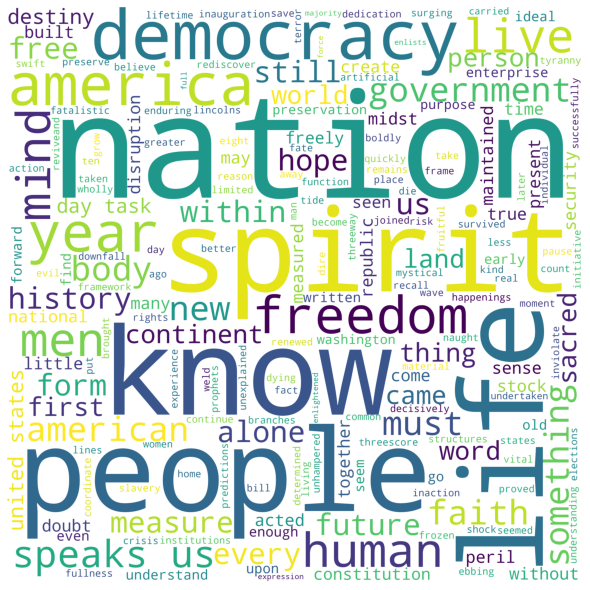

In [308]:

wordcloud = WordCloud(stopwords=STOPWORDS,
                      width = 3000, height = 3000, 
                background_color ='white', 
                min_font_size = 10, random_state=100).generate(Word_Cloud_Roosevelt) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for President Roosevelt after removing stopwords (after cleaning)!!")
plt.show()

# For Kennedy

In [309]:
stop_words= list(stopwords.words('english'))

In [310]:
corpus_Kennedy= df_text_Kennedy['speech'].apply(lambda x:' '.join([z for z in x.split() if z not in stop_words]))
corpus_Kennedy

0     vice president johnson mr speaker mr chief jus...
1     world different man holds mortal hands power a...
2     dare forget today heirs first revolution let w...
3     let every nation know whether wishes us well i...
4                                           much pledge
5     old allies whose cultural spiritual origins sh...
6     new states welcome ranks free pledge word one ...
7     peoples huts villages across globe struggling ...
8     sister republics south border offer special pl...
9     world assembly sovereign states united nations...
10    finally nations would make adversary offer ple...
11    dare tempt weakness arms sufficient beyond dou...
12    neither two great powerful groups nations take...
13    let us begin anew remembering sides civility s...
14    let sides explore problems unite us instead be...
15    let sides first time formulate serious precise...
16    let sides seek invoke wonders science instead ...
17    let sides unite heed corners earth command

In [311]:
Word_Cloud_Kennedy= ' '.join(corpus_Kennedy)
Word_Cloud_Kennedy

'vice president johnson mr speaker mr chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change sworn almighty god solemn oath forebears l prescribed nearly century three quarters ago world different man holds mortal hands power abolish forms human poverty forms human life yet revolutionary beliefs forebears fought still issue around globe belief rights man come generosity state hand god dare forget today heirs first revolution let word go forth time place friend foe alike torch passed new generation americans born century tempered war disciplined hard bitter peace proud ancient heritage unwilling witness permit slow undoing human rights nation always committed committed today home around world let every nation know whether wishes us well ill shall pay price bear burden meet hardship support friend oppose foe order assure survival 

Word Cloud for President Kennedy after removing stopword (after cleaning)!!


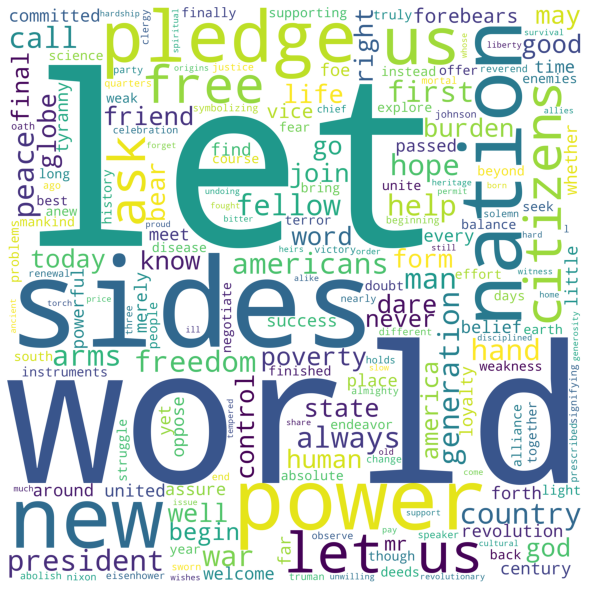

In [313]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      width = 3000, height = 3000, 
                background_color ='white', 
                min_font_size = 10, random_state=100).generate(Word_Cloud_Kennedy) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for President Kennedy after removing stopword (after cleaning)!!")
plt.show()

# For Nixon

In [314]:
stop_words= list(stopwords.words('english'))

In [315]:

corpus_Nixon= df_text_Nixon['speech'].apply(lambda x:' '.join([z for z in x.split() if z not in stop_words]))
corpus_Nixon

0     mr vice president mr speaker mr chief justice ...
1     met four years ago america bleak spirit depres...
2        meet today stand threshold new era peace world
3     central question us shall use peace let us res...
4     let us resolve become time great responsibilit...
5     past year saw farreaching results new policies...
6     peace seek world flimsy peace merely interlude...
7     important understand necessity limitations ame...
8              unless america work preserve peace peace
9          unless america work preserve freedom freedom
10    let us clearly understand new nature americas ...
11                     shall respect treaty commitments
12    shall support vigorously principle country rig...
13    shall continue era negotiation work limitation...
14    shall share defending peace freedom world shal...
15    time passed america make every nations conflic...
16    respect right nation determine future also rec...
17    americas role indispensable preserving wor

In [316]:
Word_Cloud_Nixon= ' '.join(corpus_Nixon)
Word_Cloud_Nixon

'mr vice president mr speaker mr chief justice senator cook mrs eisenhower fellow citizens great good country share together met four years ago america bleak spirit depressed prospect seemingly endless war abroad destructive conflict home meet today stand threshold new era peace world central question us shall use peace let us resolve era enter postwar periods often time retreat isolation leads stagnation home invites new danger abroad let us resolve become time great responsibilities greatly borne renew spirit promise america enter third century nation past year saw farreaching results new policies peace continuing revitalize traditional friendships missions peking moscow able establish base new durable pattern relationships among nations world americas bold initiatives 1972 long remembered year greatest progress since end world war ii toward lasting peace world peace seek world flimsy peace merely interlude wars peace endure generations come important understand necessity limitations

Word Cloud for President Nixon after removing stopword (after cleaning)!!


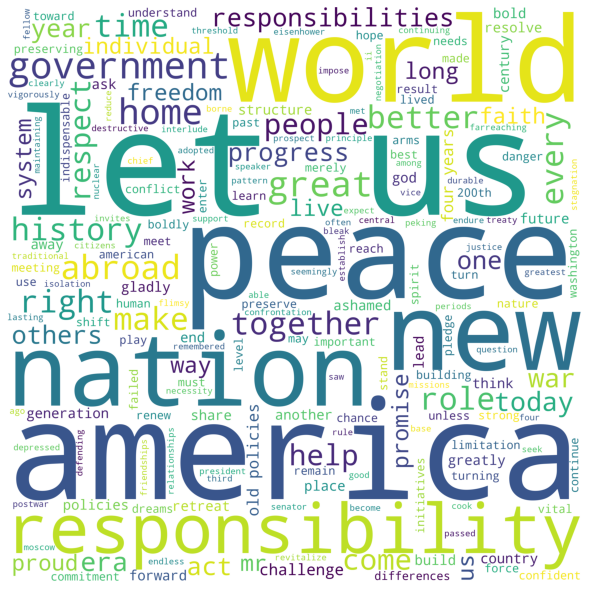

In [318]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      width = 3000, height = 3000, 
                background_color ='white', 
                min_font_size = 10, random_state=100).generate(Word_Cloud_Nixon) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for President Nixon after removing stopword (after cleaning)!!")
plt.show()